<table style="border:1px solid gray">
    <thead style="border:1px solid gray">
        <tr>
            <th>index</th>
            <th>df명</th>
            <th>설명</th>
            <th>비교</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0</td>
            <td>df0_base</td>
            <td>최소한의 전처리만 진행</td>
            <td>다른 dataframe 검증할 때 비교</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Date</b></td>
        </tr>
        <tr>
            <td>1</td>
            <td>df1_date</td>
            <td>날짜 데이터 포함</td>
            <td rowspan=3>df0_base, df1_date, df3_date 비교 후,<br>데이터 추가 후 df2_date와 비교</td>
        </tr>
        <tr>
            <td>2</td>
            <td>df2_date</td>
            <td>날짜 데이터 제거</td>
        </tr>
        <tr>
            <td>3</td>
            <td>df3_date</td>
            <td>날짜 데이터 one hot encoding</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding columns</b></td>
        </tr>
        <tr>
            <td>4</td>
            <td>df4_name</td>
            <td>어종별 수 컬럼 추가</td>
            <td rowspan=2>df0_base<br>df4_name<br>df5_import</td>
        </tr>
        <tr>
            <td>5</td>
            <td>df5_import</td>
            <td>수입용도 수 컬럼 추가</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Dropping Columns</b></td>
        </tr>
        <tr>
            <td>6</td>
            <td>df6_caegory</td>
            <td>CATEGORY_2, P_NAME 컬럼 제거</td>
            <td rowspan=2>df0_base<br>df6_category<br>df7_category</td>
        </tr>
        <tr>
            <td>7</td>
            <td>df7_category</td>
            <td>CATEGORY_1, CATEGORY_2 컬럼 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding Data</b></td>
        </tr>
        <tr>
            <td>8</td>
            <td>df8_add</td>
            <td>제조국 날씨, 한국 날씨, 원유 종가, 염도, 소비자물가지수 data 추가</td>
            <td>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Normalization</b></td>
        </tr>
        <tr>
            <td>9</td>
            <td>df9_add</td>
            <td>numerical feature 에 대한 정규화 진행</td>
            <td>df0_base<br>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Filling Missing Values</b></td>
        </tr>
        <tr>
            <td>10</td>
            <td>df10_fillna</td>
            <td>fillna(method=ffill)로 날씨 결측치 처리</td>
            <td rowspan=2>df0_base<br>df10_fillna<br>df11_fillna</td>
        </tr>
        <tr>
            <td>11</td>
            <td>df11_fillna</td>
            <td>fillna(method=bfill)로 날씨 결측치 처리</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Processing Outliers</b></td>
        </tr>
        <tr>
            <td>12</td>
            <td>df12_outlier</td>
            <td>전체 날씨 데이터 정규화 후 outlier 일괄 제거</td>
            <td rowspan=2>df0_base<br>df12_outlier<br>df13_outlier</td>
        </tr>
        <tr>
            <td>13</td>
            <td>df13_outlier</td>
            <td>나라별로 최저/최고 기온 파악 후 outlier 개별 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Grouping</b></td>
        </tr>
        <tr>
            <td>13</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>

# 전처리 가설 검증
- df_train + 추가데이터 전부 사용  
- 5개 나라에 대해서만 진행('칠레', '중국', '노르웨이', '태국', '베트남') > ctry_list 변수에 포함되어 있음

# 모델 3개 만들어보기 (오징어,연어,흰다리새우)

# Setting

In [588]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [589]:
from datetime import date, timedelta


def set_week(df, date):
    '''
    df : datetime 형식의 컬럼을 가지고 있는 dataframe
    date : df에서 datetime 형식을 가진 컬럼명
    return : date의 연도 컬럼과 주차 컬럼을 추가한 dataframe
    '''
    df[date] = pd.to_datetime(df[date])
    df[date] = df[date].dt.date
    df['year'] = df.apply(func=lambda x: x[date].isocalendar()[0], axis=1)
    df['week'] = df.apply(func=lambda x: x[date].isocalendar()[1], axis=1)
    df.drop(date, axis=1, inplace=True)
    

def check_week(df):
    '''
    df에 date가 전부 있는지 확인
    '''
    cnt = 0
    sdate = date(2015, 12, 28)   # start date
    edate = date(2019, 12, 30)   # end date
    delta = edate - sdate       # as timedelta
    mem = set()
    
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        year, week = day.isocalendar()[0], day.isocalendar()[1]
        if year * 100 + week in mem:
          continue
        mem.add(year * 100 + week)
        if df[(df['year'] == year) & (df['week'] == week)].empty:
          print((year, week), end="")
          cnt += 1
    if cnt > 0:
        print()
    print("missing", cnt, "values")    

In [590]:
def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5


def train_model(train_data, target_data, model=LinearRegression()):  # baseline model : LInearRegression
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, random_state=0)

    model.fit(x_train, y_train)
    print("Model Training Complete!")

    pred_train, pred_test = model.predict(x_train), model.predict(x_test)
    
    plt.figure(figsize=(10, 8))
#     plt.scatter(pred_train, y_train, s=10)
    sns.regplot(pred_train, y_train, color='g')
    plt.xlabel("Predicted price")
    plt.ylabel("Actual price")
    plt.show()

    # cvs = cross_val_score(model, x_test, y_test, cv = 5)
    # print(">> cross_val_score mean =", cvs.mean())
    print(">> RMSE train =", RMSE(y_train, pred_train))
    print(">> RMSE validation =", RMSE(y_test, pred_test))
    print(">> MAE train =", mean_absolute_error(pred_train, y_train))
    print(">> MAE validation =", mean_absolute_error(pred_test, y_test))
    print("-------------------------------------------------")
    
    return model

    
def print_importance(model, df, added_columns):
    importance = model.coef_
    fs_data = []
    for i, x in enumerate(importance):
        fs_data.append([abs(x), df.columns[i]])
    fs_data.sort(key=lambda x: x[0], reverse=True)
   
    # 추가한 컬럼의 중요도
    for i in range(len(fs_data)):
        if fs_data[i][1] in added_columns:
            print(fs_data[i][1], ":", fs_data[i][0] ,">", i, "순위")
    print("-------------------------------------------------")
    print("총", len(fs_data) , "개")
    
    return fs_data

In [591]:
root = os.path.join(os.getcwd(), 'DATA')

In [592]:
ctry_list = ['칠레', '중국', '노르웨이', '태국', '베트남']  # 사용할 나라 목록

# Import Data

In [593]:
df_train = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_weather_code = pd.read_csv(os.path.join(root, 'raw_weather_code.csv'), header=None, index_col=0)
weather_list = [pd.read_csv(os.path.join(root, 'raw_weather_20151228_20161227.csv'), encoding='cp949') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20161228_20171227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20171228_20181227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20181228_20191227.csv'), encoding='cp949') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20191228_20201227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20201228_20210818.csv'), encoding='euc-kr')]

In [594]:
df_oil = pd.read_csv(os.path.join(root, 'preprocessed_oil.csv'))
df_weather = pd.read_csv(os.path.join(root, 'preprocessed_weather.csv'))
df_weather_kr = pd.read_csv(os.path.join(root, 'preprocessed_weather_korea.csv'))
df_cpi = pd.read_csv(os.path.join(root, 'preprocessed_cpi.csv'))
df_exchange = pd.read_csv(os.path.join(root, 'preprocessed_exchange.csv'))

제조국 날씨의 경우 결측치 처리 과정이 필요하기 때문에 raw data를 가져온다

# df_train

In [595]:
df_train

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340
...,...,...,...,...,...,...,...,...,...,...
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967


In [596]:
df_train.drop('P_TYPE',axis=1,inplace=True)

# df0_base

## preprocessing

In [597]:
# df_train_copy = df_train_main.copy()

# set_week(df_train_copy, 'REG_DATE')

# check_week(df_train_copy) # 2017년 2주차에 결측치 존재

In [598]:
df0_base = df_train.copy()

df0_base = df0_base.replace([np.datetime64('2017-01-01'), np.datetime64('2017-01-06')],
                            [np.datetime64('2017-01-02'), np.datetime64('2017-01-09')]) # 결측치 제거를 위해 2017/01/01 -> 2017/01/06 , 2017/01/02 -> 2017/01/09 값 대치

import_type_list = set()
for tmp in df0_base.P_IMPORT_TYPE.unique():
    for a in tmp.split(','):
        import_type_list.add(a)

In [599]:
for name in import_type_list:
    df0_base[name] = 0
    df0_base.loc[df0_base['P_IMPORT_TYPE'].str.contains(name, regex=False), name] = 1

In [600]:
set_week(df0_base, 'REG_DATE')

In [601]:
check_week(df0_base) # 결측치 제거 완료

missing 0 values


## Encoding

In [602]:
df0_base.drop('P_IMPORT_TYPE',axis=1,inplace=True)

df0_base_encoding = pd.get_dummies(df0_base,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df0_base_encoding

,P_PRICE,활,머리_외화획득용,절단,슬라이스(S),곤이,냉장,머리,알,줄기,염장,볼살,간,집게다리,내장,한쪽껍질붙은,꼬리_외화획득용,다리,턱살,머리살,건조,눈살,포장횟감,자숙,훈제,지느러미,캐비아대용,필렛(F),횟감,개아지살,껍질,외투막,난포선,살,냉동,목살,동체,창난,year,week,...,P_NAME_코드아이스피쉬,P_NAME_코토니,P_NAME_쿠자조기,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_큰실말,P_NAME_큰징거미새우,P_NAME_키조개,P_NAME_태평양먹장어,P_NAME_털게,P_NAME_톱날꽃게,P_NAME_톳,P_NAME_틸라피아,P_NAME_파타고니아이빨고기,P_NAME_프로펠러조개,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍감펭,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍서대,P_NAME_홍어,"P_NAME_홍연어,Red salmon",P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황돔,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_회초리꼬리민태,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흑점샛돔알,P_NAME_흑점줄전갱이,P_NAME_흰꼴뚜기,P_NAME_흰다리새우
0,7.480000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.920000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.356352,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18.260870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2015,53,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42068,38.437099,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42070,23.396192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


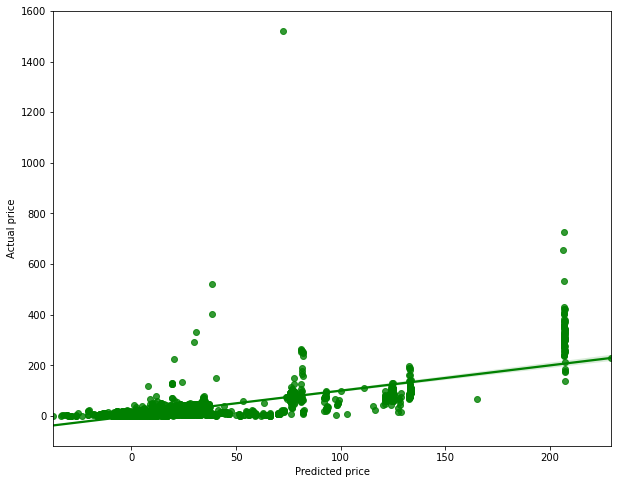

>> RMSE train = 14.252151597364536
>> RMSE validation = 30332364.58039932
>> MAE train = 4.178629998279011
>> MAE validation = 1021074.3585713477
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [603]:
x_features = df0_base_encoding.iloc[:,1:]
y_target = df0_base_encoding['P_PRICE']

train_model(x_features,y_target)

Model Training Complete!


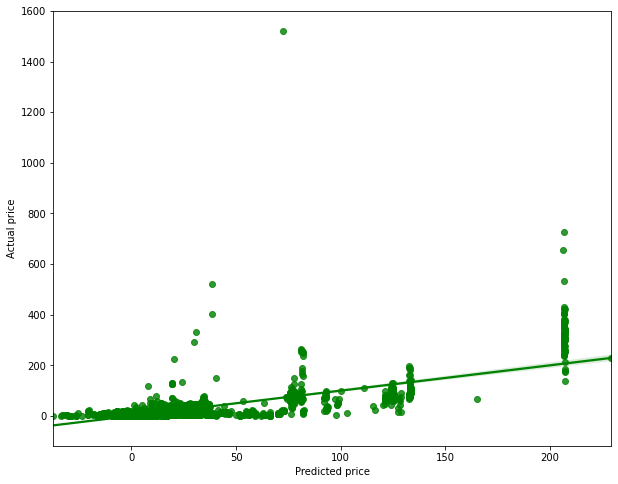

>> RMSE train = 14.252151597364536
>> RMSE validation = 30332364.58039932
>> MAE train = 4.178629998279011
>> MAE validation = 1021074.3585713477
-------------------------------------------------
-------------------------------------------------
총 625 개


In [604]:
# plot feature importance
model0 = train_model(x_features,y_target)
features = print_importance(model0, df0_base_encoding, [])

# df_squid

In [605]:
df_squid = df0_base[(df0_base['P_NAME']=='오징어') & ((df0_base['CTRY_2']=='페루') | (df0_base['CTRY_2']=='중국') | (df0_base['CTRY_2']=='칠레'))]

df_squid = df_squid[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_squid

,CTRY_1,CTRY_2,P_PRICE,year,week
94,중국,중국,0.793729,2015,53
119,페루,페루,1.233434,2015,53
143,페루,페루,5.481140,2015,53
160,칠레,칠레,0.968083,2015,53
166,칠레,칠레,0.762758,2015,53
...,...,...,...,...,...
42016,칠레,칠레,2.247963,2020,1
42021,페루,페루,5.269235,2020,1
42027,페루,페루,1.760060,2020,1
42045,페루,페루,2.281843,2020,1


## Merge Features

In [606]:
df_squid_add = pd.merge(df_squid, df_weather_kr, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_squid_add = pd.merge(df_squid_add, df_oil, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_cpi, how='left', on=['year', 'week'])
df_squid_add = pd.merge(df_squid_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_squid_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,중국,중국,0.793729,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541
1,중국,중국,0.793729,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541
2,페루,페루,1.233434,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.22,101.26,0.2943
3,페루,페루,1.233434,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.39,100.76,0.2943
4,페루,페루,5.481140,2015,53,5.352941,7.973109,13.732174,NaN,NaN,NaN,37.08,100.22,101.26,0.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,페루,페루,1.760060,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.79,118.44,0.3013
2379,페루,페루,2.281843,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.12,116.99,0.3013
2380,페루,페루,2.281843,2020,1,6.534266,6.942657,13.188652,NaN,NaN,NaN,61.66,105.79,118.44,0.3013
2381,중국,중국,4.108244,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.12,116.99,0.1431


In [607]:
df_squid_add = df_squid_add.sort_values('CTRY_2')

## Filling Missing Value

In [608]:
df_squid_add.isna().sum() # 페루 날씨 데이터 결측값 존재

CTRY_1               0
CTRY_2               0
P_PRICE              0
year                 0
week                 0
wind_kr              0
temperature_kr       0
water_temp_kr        0
rain              1055
wind              1055
temperature       1055
oil                  0
cpi_total            0
cpi_fish             0
exchange             0
dtype: int64

In [609]:
df_squid_add.fillna(method='ffill',inplace=True)  # 가까운 나라인 칠레 데이터로 대체

In [610]:
df_squid_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [611]:
df_squid_add = df_squid_add.groupby(['year','week']).mean()

df_squid_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                      ...                               
2015 53    1.700255  5.352941        7.973109  ...    100.305   101.010  0.124483
2016 1     1.787152  6.739496        6.356303  ...    100.390   100.760  0.183650
     2     1.345855  6.095798        5.514286  ...    100.390   100.760  0.147314
     3     1.756002  9.819643        0.268750  ...    100.390   100.760  0.163711
     4     2.522180  7.211224        4.908163  ...    100.390   100.760  0.231240
...             ...       ...             ...  ...        ...       ...       ...
2019 49    2.376248  7.260150        7.243609  ...    105.120   116.990  0.176173
     50    2.886105  6.208276       10.433793  ...    105.120   116.990  0.186499
     51    2.554381  6.806122        9.477551  ...    105.120   116.990  0.145980
     52    4.346584  6.362585        8.774830  ...    105.120   116.990  0.136179
2020 1     2.970531  6.534266        6.942657  ...    105.455   117.715  0.183398

[208 rows x 11 columns]

### Result

Model Training Complete!


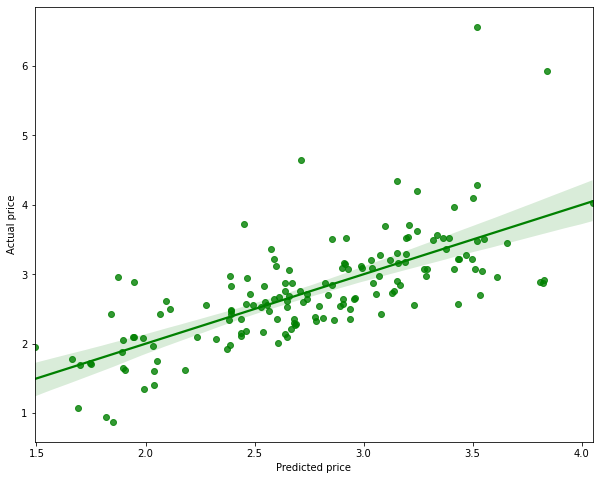

>> RMSE train = 0.5419168757121906
>> RMSE validation = 0.5147194124147247
>> MAE train = 0.37397735500082563
>> MAE validation = 0.3898312961084412
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [612]:
x_features = df_squid_add.drop('P_PRICE',axis=1)
y_target = df_squid_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

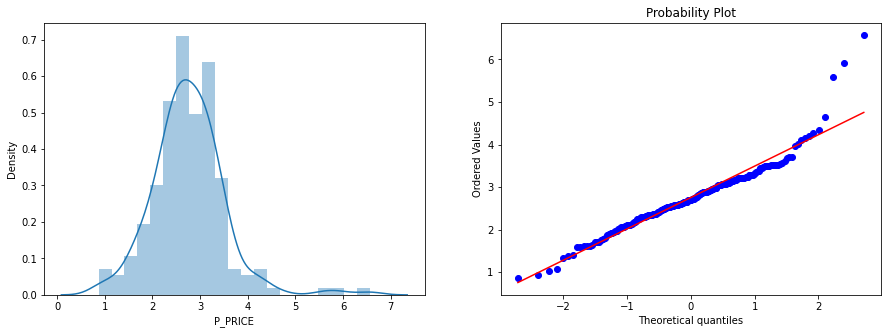

In [613]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'P_PRICE':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(121)
    sns.distplot(df_squid_add[i])
    plt.subplot(122)
    stats.probplot(df_squid_add[i] , plot=plt)

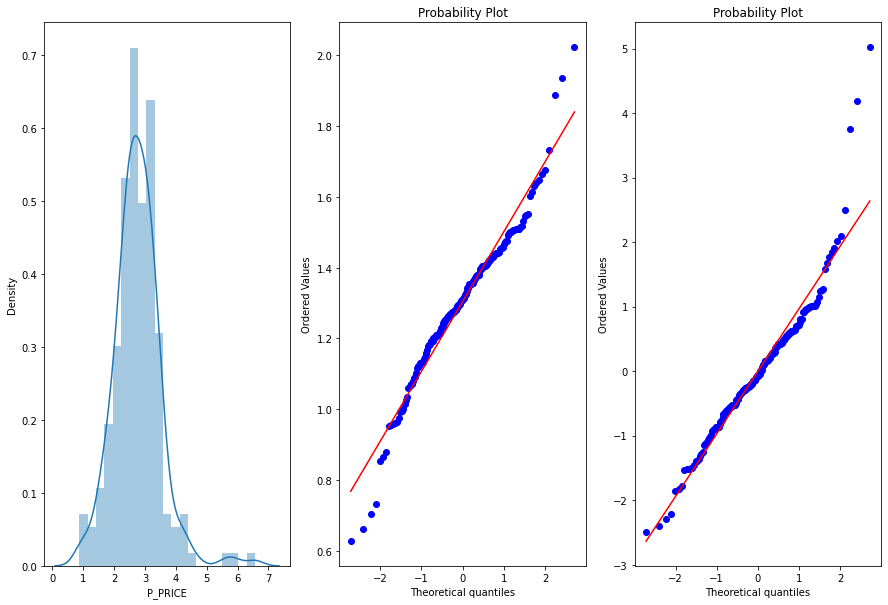

In [614]:
from scipy import stats 

fig = plt.figure(figsize = (15,10))

for i in columns:

  if i == 'P_PRICE':
    fig.add_subplot(131)
    sns.distplot(df_squid_add[i]) 
        
    df_copy = df_squid_add.copy()
    df_copy[i] = np.log1p(df_copy[i])
    fig.add_subplot(132) 
    stats.probplot(df_copy[i], dist=stats.norm, plot=plt)
    
    df_copy1 = df_squid_add.copy()
    df_copy1[i] = (df_copy1[i] - df_copy1[i].mean()) / df_copy1[i].std()
    fig.add_subplot(133) 
    stats.probplot(df_copy1[i], dist=stats.norm, plot=plt)

데이터 표준화 실시

Model Training Complete!


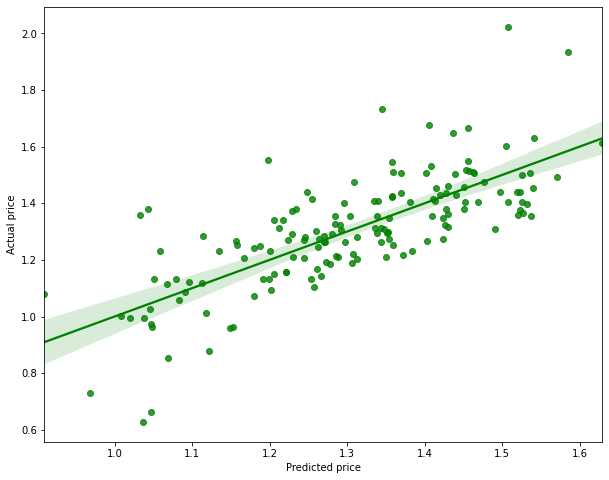

>> RMSE train = 0.13211169727517427
>> RMSE validation = 0.1348420001051878
>> MAE train = 0.09809422646875376
>> MAE validation = 0.10444572881271764
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [615]:
x_features = df_squid_add.drop('P_PRICE', axis=1)
y_target = df_squid_add['P_PRICE']

x_features = np.log1p(x_features)
y_target = np.log1p(y_target)

train_model(x_features,y_target)

## Feature Selection

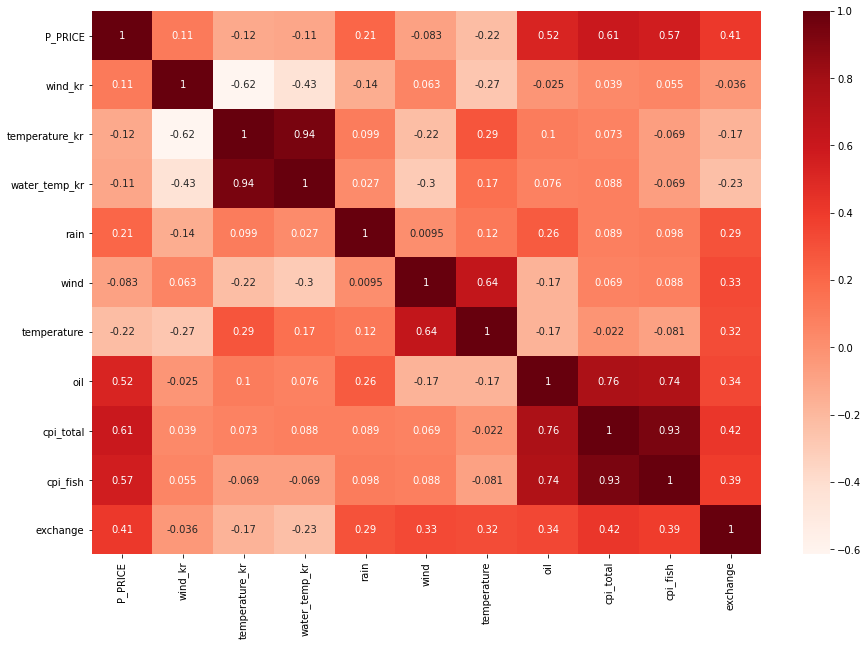

In [616]:
plt.figure(figsize=(15,10))

sns.heatmap(df_squid_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [617]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_squid_add.values, i) for i in range(df_squid_add.shape[1])]
vif['features'] = df_squid_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,2.173431,rain
1,6.879067,wind
2,25.672760,P_PRICE
3,33.052561,exchange
4,45.829640,wind_kr
5,49.724703,temperature
6,95.696461,oil
7,98.123608,temperature_kr
8,147.111586,water_temp_kr
9,2872.552657,cpi_total


In [618]:
import statsmodels.api as sm

X = df_squid_add.drop('P_PRICE',axis=1)
y = df_squid_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     20.01
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.98e-25
Time:                        08:03:05   Log-Likelihood:                -163.98
No. Observations:                 208   AIC:                             350.0
Df Residuals:                     197   BIC:                             386.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -28.8588      5.844     -4.

상관관계 낮은 변수 재조합하여 다중공선성 제거 및 각 변수들의 p-value 조정 필요

### Add Derived Variable

In [619]:
df_squid_add1 = df_squid_add.copy()

df_squid_add1['cpi'] = df_squid_add1['cpi_fish'] / df_squid_add1['cpi_total']
df_squid_add1['weather_kr'] = (df_squid_add1['water_temp_kr'] + df_squid_add1['temperature_kr'] + df_squid_add1['wind_kr']) / 3
df_squid_add1['weather'] = (df_squid_add1['rain'] + df_squid_add1['temperature'] + df_squid_add1['wind']) / 3
df_squid_add1['oil/exchange'] = (df_squid_add1['oil'] + df_squid_add1['exchange']) / 2

df_squid_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','oil','exchange','wind_kr','rain','wind','temperature'],axis=1,inplace=True)

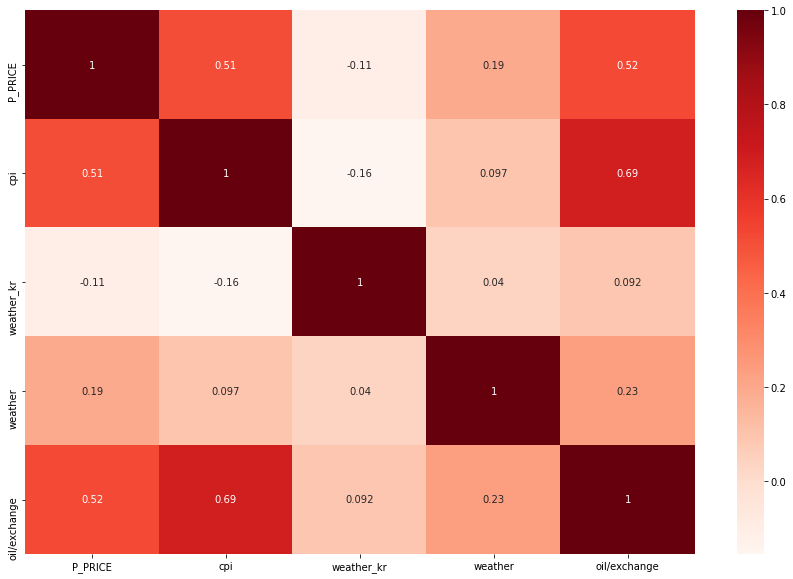

In [620]:
plt.figure(figsize=(15,10))

sns.heatmap(df_squid_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [621]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_squid_add1.values, i) for i in range(df_squid_add1.shape[1])]
vif['features'] = df_squid_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,2.367991,weather
1,11.178970,weather_kr
2,20.788938,P_PRICE
3,51.344216,cpi
4,55.290082,oil/exchange


In [622]:
import statsmodels.api as sm

X = df_squid_add1.drop('P_PRICE',axis=1)
y = df_squid_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     25.76
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.82e-17
Time:                        08:03:05   Log-Likelihood:                -194.19
No. Observations:                 208   AIC:                             398.4
Df Residuals:                     203   BIC:                             415.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.0617      2.185     -2.774   

여전히 다중공선성 존재 및 p-value가 높은 변수들 존재한다는 한계 존재

Model Training Complete!


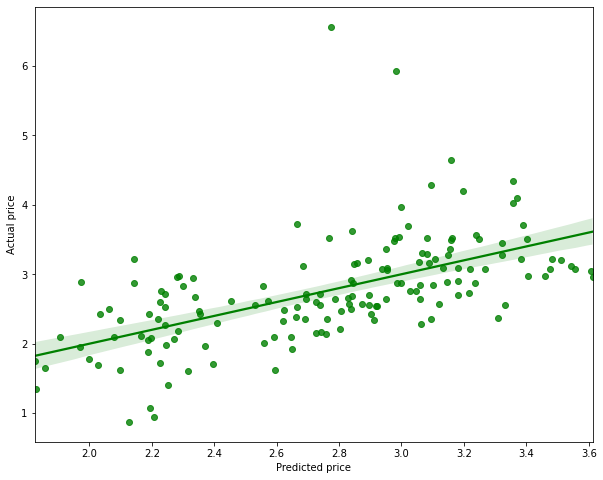

>> RMSE train = 0.6239787544527098
>> RMSE validation = 0.5905069751102244
>> MAE train = 0.4340744105924485
>> MAE validation = 0.39797783534958175
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [623]:
x_features = df_squid_add1.drop('P_PRICE', axis=1)
y_target = df_squid_add1['P_PRICE']

train_model(x_features,y_target)

### PCA

In [624]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_squid_add.drop('P_PRICE', axis=1)
y_target = df_squid_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)

In [625]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([9.81804872e-01, 8.70357880e-03, 4.69020921e-03, 3.97096541e-03,
       3.70687515e-04, 2.92132450e-04, 1.26617596e-04, 3.05738022e-05,
       1.03178810e-05, 4.57480439e-08])

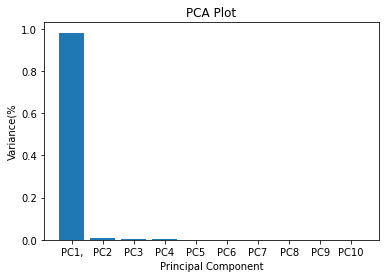

In [626]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


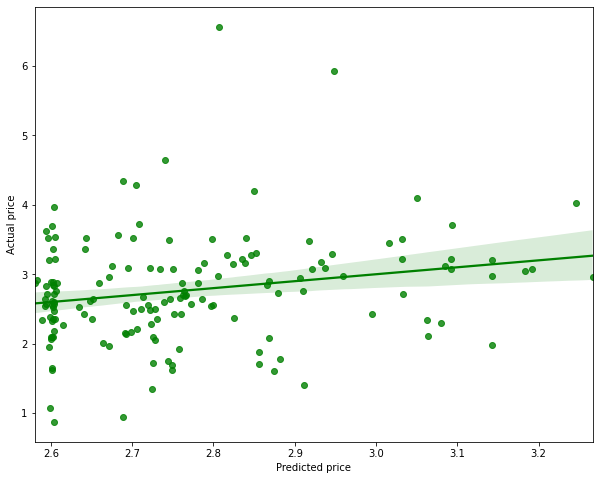

>> RMSE train = 0.7489639384718999
>> RMSE validation = 0.7183893322711181
>> MAE train = 0.5222298296779753
>> MAE validation = 0.5053190399764462
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [627]:
# 주성분 1개로 분석
x_features = df_squid_add1.drop('P_PRICE', axis=1)
y_target = df_squid_add1['P_PRICE']

pca = PCA(n_components=1)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_squid_add1['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 PCA를 하여도 모델 개선이 되지 않았으나

다중공선성을 피하기 위해선 불가피하다.

최종모델 : df_squid_add1

## Final Model

Model Training Complete!


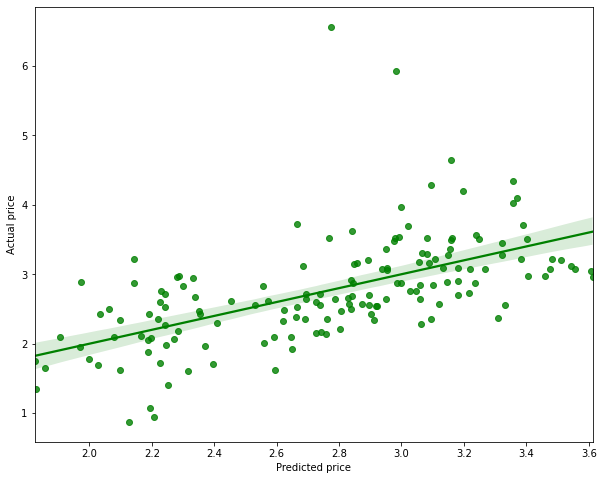

>> RMSE train = 0.6239787544527098
>> RMSE validation = 0.5905069751102244
>> MAE train = 0.4340744105924485
>> MAE validation = 0.39797783534958175
-------------------------------------------------


In [628]:
final_squid = df_squid_add1

x_features = final_squid.drop('P_PRICE', axis=1)
y_target = final_squid['P_PRICE']


final_model_squid = train_model(x_features,y_target)

# df_salmon

In [629]:
df_salmon = df0_base[(df0_base['P_NAME']=='연어') & (df0_base['CTRY_2']=='노르웨이') ]

df_salmon = df_salmon[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_salmon

,CTRY_1,CTRY_2,P_PRICE,year,week
74,노르웨이,노르웨이,12.936815,2015,53
129,노르웨이,노르웨이,19.146755,2015,53
168,노르웨이,노르웨이,12.082384,2015,53
174,노르웨이,노르웨이,13.425826,2015,53
198,노르웨이,노르웨이,8.844281,2015,53
...,...,...,...,...,...
41994,노르웨이,노르웨이,16.495971,2020,1
41995,노르웨이,노르웨이,18.350634,2020,1
42044,노르웨이,노르웨이,11.128269,2020,1
42056,노르웨이,노르웨이,15.631531,2020,1


## Merge Features

In [630]:
df_salmon_add = pd.merge(df_salmon, df_weather_kr, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_salmon_add = pd.merge(df_salmon_add, df_oil, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_cpi, how='left', on=['year', 'week'])
df_salmon_add = pd.merge(df_salmon_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_salmon_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,노르웨이,노르웨이,12.936815,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
1,노르웨이,노르웨이,12.936815,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.39,100.76,0.1149
2,노르웨이,노르웨이,19.146755,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
3,노르웨이,노르웨이,19.146755,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.39,100.76,0.1149
4,노르웨이,노르웨이,12.082384,2015,53,5.352941,7.973109,13.732174,3.045833,7.666667,1.728743,37.08,100.22,101.26,0.1149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,노르웨이,노르웨이,11.128269,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.79,118.44,0.1134
1560,노르웨이,노르웨이,15.631531,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134
1561,노르웨이,노르웨이,15.631531,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.79,118.44,0.1134
1562,노르웨이,노르웨이,13.205675,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134


## Filling Missing Value

In [631]:
df_salmon_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [632]:
df_salmon_add = df_salmon_add.groupby(['year','week']).mean()

df_salmon_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2015 53    13.287212  5.352941        7.973109  ...    100.305   101.010    0.1149
2016 1     12.853869  6.739496        6.356303  ...    100.390   100.760    0.1126
     2     12.876513  6.095798        5.514286  ...    100.390   100.760    0.1119
     3     13.387350  9.819643        0.268750  ...    100.390   100.760    0.1124
     4     12.644323  7.211224        4.908163  ...    100.390   100.760    0.1142
...              ...       ...             ...  ...        ...       ...       ...
2019 49    14.950249  7.260150        7.243609  ...    105.120   116.990    0.1091
     50    16.568750  6.208276       10.433793  ...    105.120   116.990    0.1093
     51    17.718908  6.806122        9.477551  ...    105.120   116.990    0.1110
     52    17.016213  6.362585        8.774830  ...    105.120   116.990    0.1116
2020 1     17.483831  6.534266        6.942657  ...    105.455   117.715    0.1134

[210 rows x 11 columns]

### Result

Model Training Complete!


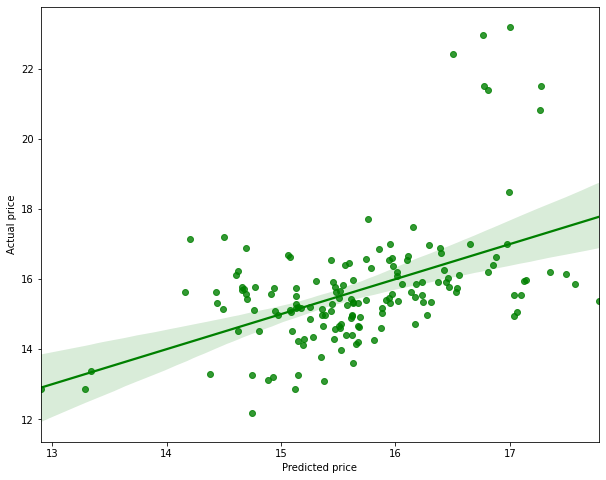

>> RMSE train = 1.4955606735721279
>> RMSE validation = 1.7255058340690708
>> MAE train = 1.0314734759254187
>> MAE validation = 1.2807946372890722
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [633]:
x_features = df_salmon_add.drop('P_PRICE',axis=1)
y_target = df_salmon_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

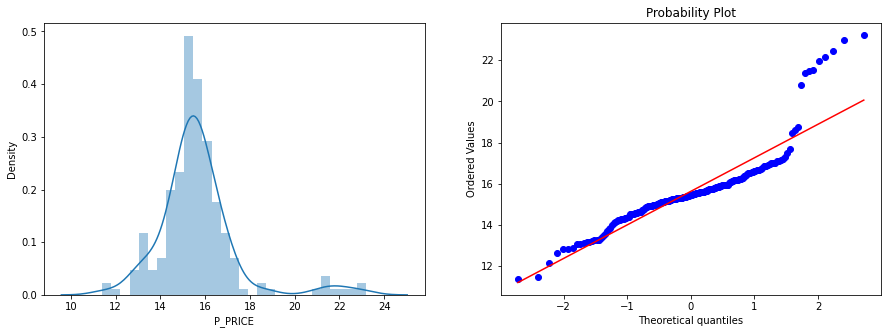

In [634]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'P_PRICE':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(121)
    sns.distplot(df_salmon_add[i])
    plt.subplot(122)
    stats.probplot(df_salmon_add[i] , plot=plt)

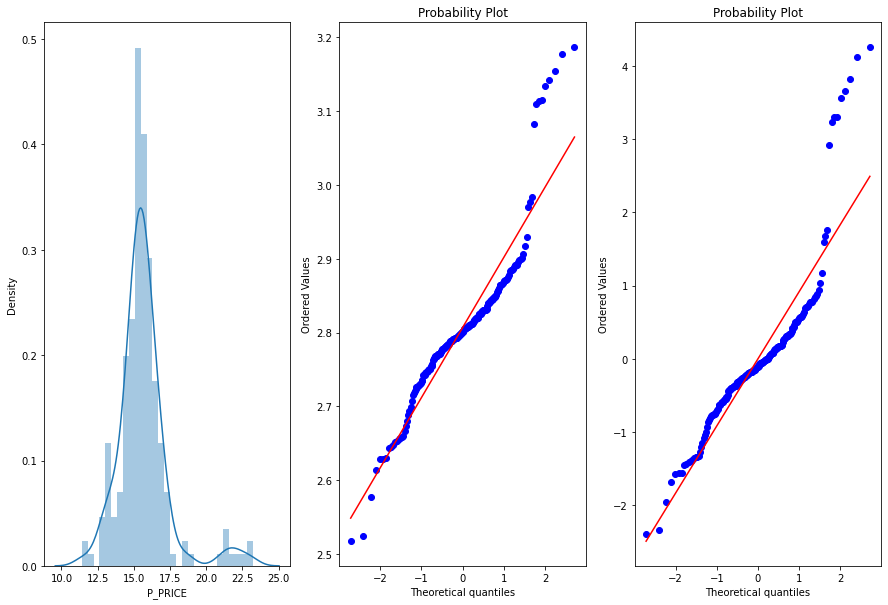

In [635]:
from scipy import stats 

fig = plt.figure(figsize = (15,10))

for i in columns:

  if i == 'P_PRICE':
    fig.add_subplot(131)
    sns.distplot(df_salmon_add[i]) 
        
    df_copy = df_salmon_add.copy()
    df_copy[i] = np.log1p(df_copy[i])
    fig.add_subplot(132) 
    stats.probplot(df_copy[i], dist=stats.norm, plot=plt)
    
    df_copy1 = df_salmon_add.copy()
    df_copy1[i] = (df_copy1[i] - df_copy1[i].mean()) / df_copy1[i].std()
    fig.add_subplot(133) 
    stats.probplot(df_copy1[i], dist=stats.norm, plot=plt)

데이터 표준화 실시

Model Training Complete!


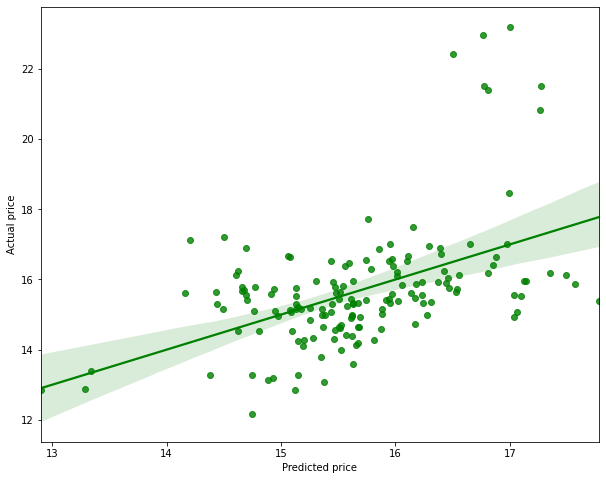

>> RMSE train = 1.4955606735721279
>> RMSE validation = 1.7255058340690739
>> MAE train = 1.0314734759254192
>> MAE validation = 1.2807946372890726
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [636]:
x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

scaler = StandardScaler()
x_features = scaler.fit_transform(x_features)

train_model(x_features,y_target)

## Feature Selection

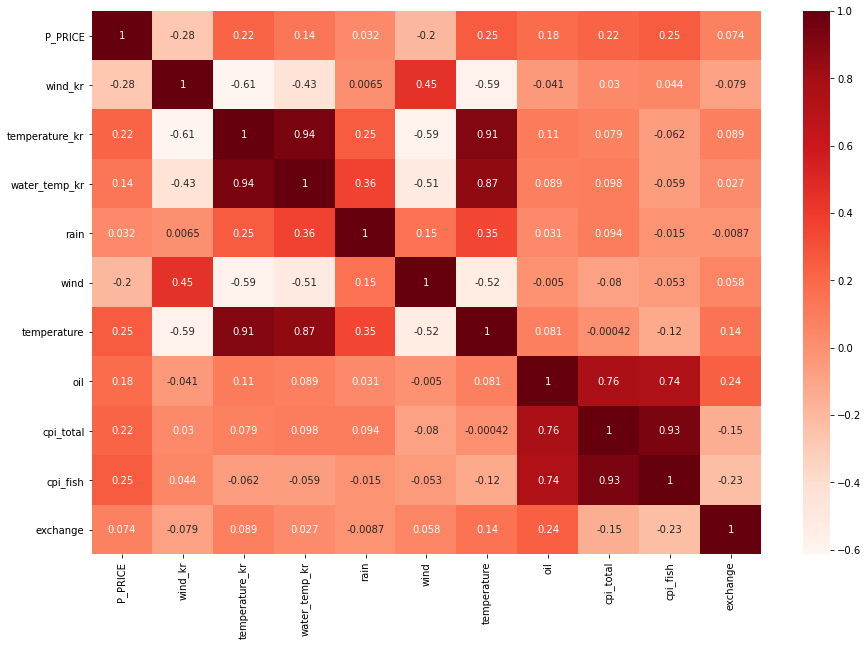

In [637]:
plt.figure(figsize=(15,10))

sns.heatmap(df_salmon_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_salmon_add.values, i) for i in range(df_salmon_add.shape[1])]
vif['features'] = df_salmon_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,11.619903,temperature
1,15.010068,rain
2,45.291804,wind_kr
3,46.358892,wind
4,102.870942,temperature_kr
5,103.233396,P_PRICE
6,112.780228,oil
7,153.401376,water_temp_kr
8,1021.283562,exchange
9,6613.625063,cpi_fish


In [639]:
import statsmodels.api as sm

X = df_salmon_add.drop('P_PRICE',axis=1)
y = df_salmon_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     6.126
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           3.99e-08
Time:                        08:03:09   Log-Likelihood:                -389.91
No. Observations:                 210   AIC:                             801.8
Df Residuals:                     199   BIC:                             838.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.1185     16.797      0.

상관관계 낮은 변수 재조합하여 다중공선성 제거 및 각 변수들의 p-value 조정 필요

### Add Derived Variable

In [640]:
df_salmon_add1 = df_salmon_add.copy()

df_salmon_add1['cpi'] = df_salmon_add1['cpi_fish'] / df_salmon_add1['cpi_total']
df_salmon_add1['weather_kr'] = (df_salmon_add1['water_temp_kr'] + df_salmon_add1['temperature_kr']+df_salmon_add1['wind_kr']) / 3
df_salmon_add1['weather'] = (df_salmon_add1['rain'] + df_salmon_add1['temperature']+df_salmon_add1['wind']) / 3
df_salmon_add1['oil/exchange'] = df_salmon_add1['oil'] / df_salmon_add1['exchange']

df_salmon_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

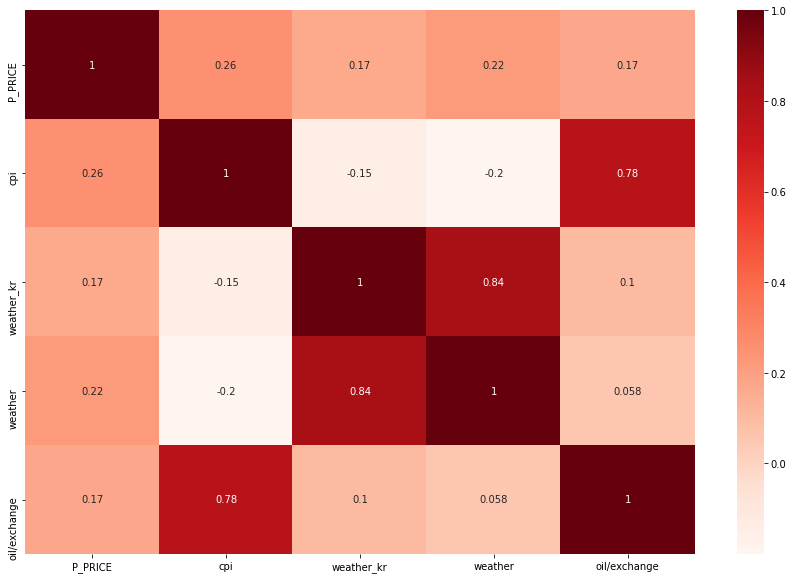

In [641]:
plt.figure(figsize=(15,10))

sns.heatmap(df_salmon_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [642]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_salmon_add1.values, i) for i in range(df_salmon_add1.shape[1])]
vif['features'] = df_salmon_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,22.466040,weather
1,37.326807,weather_kr
2,44.447942,oil/exchange
3,91.489680,P_PRICE
4,134.108980,cpi


In [643]:
import statsmodels.api as sm

X = df_salmon_add1.drop('P_PRICE',axis=1)
y = df_salmon_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     10.17
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.57e-07
Time:                        08:03:10   Log-Likelihood:                -399.09
No. Observations:                 210   AIC:                             808.2
Df Residuals:                     205   BIC:                             824.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.6315      6.675     -2.641   

Model Training Complete!


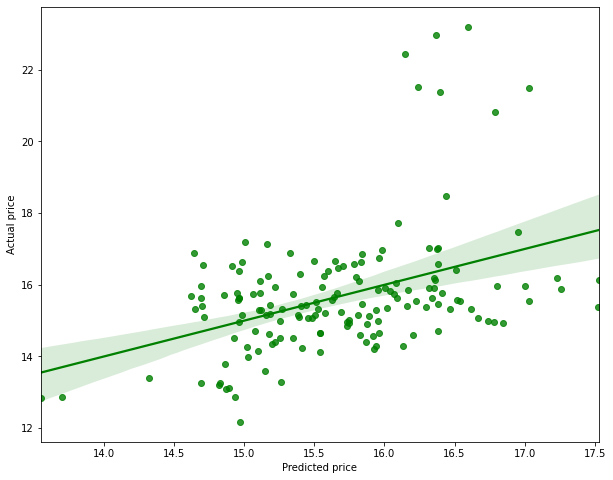

>> RMSE train = 1.5615140323451995
>> RMSE validation = 1.799126597339904
>> MAE train = 1.0833691936403682
>> MAE validation = 1.354213019945178
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [644]:
x_features = df_salmon_add1.drop('P_PRICE', axis=1)
y_target = df_salmon_add1['P_PRICE']

train_model(x_features,y_target)

기존의 변수들을 재조합하여 파생변수들을 생성하였지만 여전히 다중공선성 존재하고 p-value 값이 높은 변수가 존재한다는 한계 존재

### PCA

In [645]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)


In [646]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([4.99631574e-01, 4.27875522e-01, 3.50322993e-02, 1.69099770e-02,
       1.22892312e-02, 3.45373320e-03, 2.72012727e-03, 1.26673058e-03,
       8.20747028e-04, 5.83137387e-08])

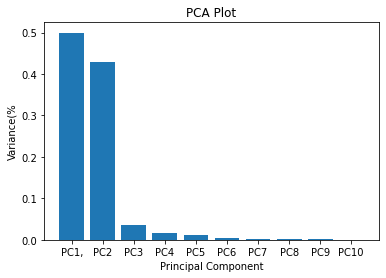

In [647]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


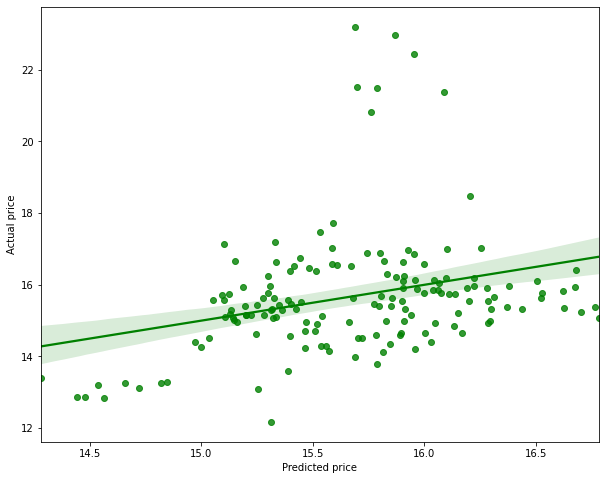

>> RMSE train = 1.6401777505918875
>> RMSE validation = 1.8830945683923939
>> MAE train = 1.0450694543564196
>> MAE validation = 1.373333748589184
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [648]:
# 주성분 2개로 분석
x_features = df_salmon_add.drop('P_PRICE', axis=1)
y_target = df_salmon_add['P_PRICE']

pca = PCA(n_components=2)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_salmon_add['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 PCA를 했음에도 모델 개선이 이뤄지지 않았으나

다중공선성을 피하기 위해선 불가피하다.

최종 모델 : df_salmon_add1

## Final Model

Model Training Complete!


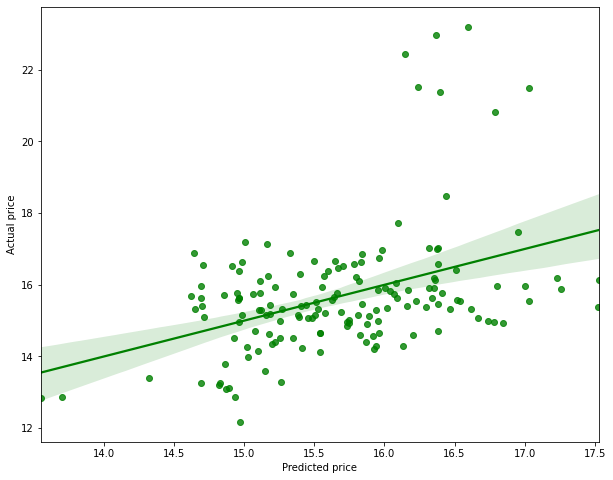

>> RMSE train = 1.5615140323451995
>> RMSE validation = 1.799126597339904
>> MAE train = 1.0833691936403682
>> MAE validation = 1.354213019945178
-------------------------------------------------


In [649]:
final_salmon = df_salmon_add1

x_features = final_salmon.drop('P_PRICE', axis=1)
y_target = final_salmon['P_PRICE']


final_model_salmon = train_model(x_features,y_target)

# df_whiteleg_shrimp

In [650]:
df_whiteleg_shrimp = df0_base[(df0_base['P_NAME']=='흰다리새우') & ((df0_base['CTRY_2']=='베트남') | (df0_base['CTRY_2']=='태국'))]

df_whiteleg_shrimp = df_whiteleg_shrimp[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_whiteleg_shrimp

,CTRY_1,CTRY_2,P_PRICE,year,week
36,태국,태국,13.377047,2015,53
37,태국,태국,15.050566,2015,53
103,태국,태국,19.653302,2015,53
122,베트남,베트남,12.903215,2015,53
132,태국,태국,9.125593,2015,53
...,...,...,...,...,...
41932,베트남,베트남,13.953618,2020,1
41961,태국,태국,11.912033,2020,1
41980,태국,태국,11.500000,2020,1
42023,베트남,베트남,7.701577,2020,1


## Merge Features

In [651]:
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp, df_weather_kr, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_oil, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_cpi, how='left', on=['year', 'week'])
df_whiteleg_shrimp_add = pd.merge(df_whiteleg_shrimp_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_whiteleg_shrimp_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,태국,태국,13.377047,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
1,태국,태국,13.377047,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.39,100.76,0.027700
2,태국,태국,15.050566,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
3,태국,태국,15.050566,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.39,100.76,0.027700
4,태국,태국,19.653302,2015,53,5.352941,7.973109,13.732174,0.421429,4.000000,26.792857,37.08,100.22,101.26,0.027700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,태국,태국,11.500000,2020,1,6.534266,6.942657,13.188652,0.075000,3.000000,28.600000,61.66,105.79,118.44,0.033400
2149,베트남,베트남,7.701577,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.12,116.99,0.000043
2150,베트남,베트남,7.701577,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.79,118.44,0.000043
2151,베트남,베트남,8.353018,2020,1,6.534266,6.942657,13.188652,4.132394,2.521127,23.443662,61.66,105.12,116.99,0.000043


## Filling Missing Value

In [652]:
df_whiteleg_shrimp_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

## Grouping

In [653]:
df_whiteleg_shrimp_add = df_whiteleg_shrimp_add.groupby(['year','week']).mean()

df_whiteleg_shrimp_add

P_PRICE   wind_kr  temperature_kr  ...  cpi_total  cpi_fish  exchange
year week                                       ...                               
2015 53    12.010656  5.352941        7.973109  ...    100.305   101.010  0.012336
2016 1     10.246929  6.739496        6.356303  ...    100.390   100.760  0.010415
     2     11.736044  6.095798        5.514286  ...    100.390   100.760  0.013822
     3     10.435141  9.819643        0.268750  ...    100.390   100.760  0.012247
     4     10.350206  7.211224        4.908163  ...    100.390   100.760  0.015184
...              ...       ...             ...  ...        ...       ...       ...
2019 49    11.393362  7.260150        7.243609  ...    105.120   116.990  0.014691
     50    10.760669  6.208276       10.433793  ...    105.120   116.990  0.014691
     51    11.022549  6.806122        9.477551  ...    105.120   116.990  0.011062
     52    10.909145  6.362585        8.774830  ...    105.120   116.990  0.011062
2020 1     11.759048  6.534266        6.942657  ...    105.455   117.715  0.016722

[210 rows x 11 columns]

### Result

Model Training Complete!


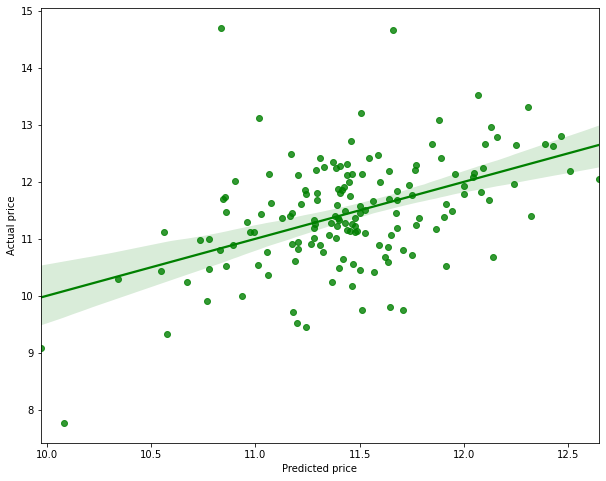

>> RMSE train = 0.8468280225787485
>> RMSE validation = 0.7971877984421889
>> MAE train = 0.6238266699837306
>> MAE validation = 0.5923569398695252
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [654]:
x_features = df_whiteleg_shrimp_add.drop('P_PRICE',axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

train_model(x_features,y_target)

## Scaling

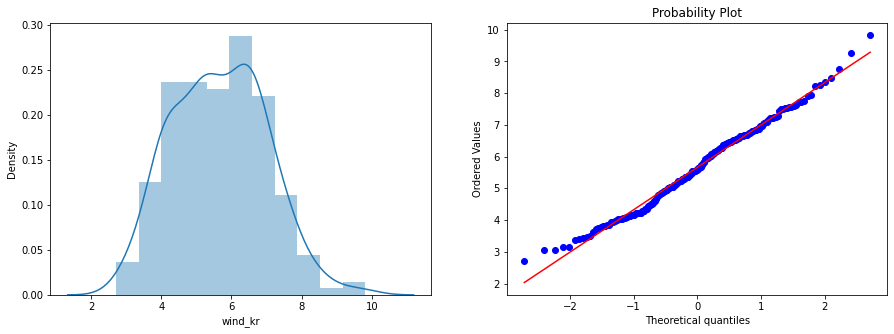

In [724]:
columns = ['wind_kr','temperature_kr','water_temp_kr','rain','wind','temperature','oil','cpi_total','cpi_fish','exchange','P_PRICE']

for i in columns:

  if i == 'wind_kr':
    f, ax = plt.subplots(figsize = (15, 5)) 
    plt.subplot(121)
    sns.distplot(df_whiteleg_shrimp_add[i])
    plt.subplot(122)
    stats.probplot(df_whiteleg_shrimp_add[i] , plot=plt)

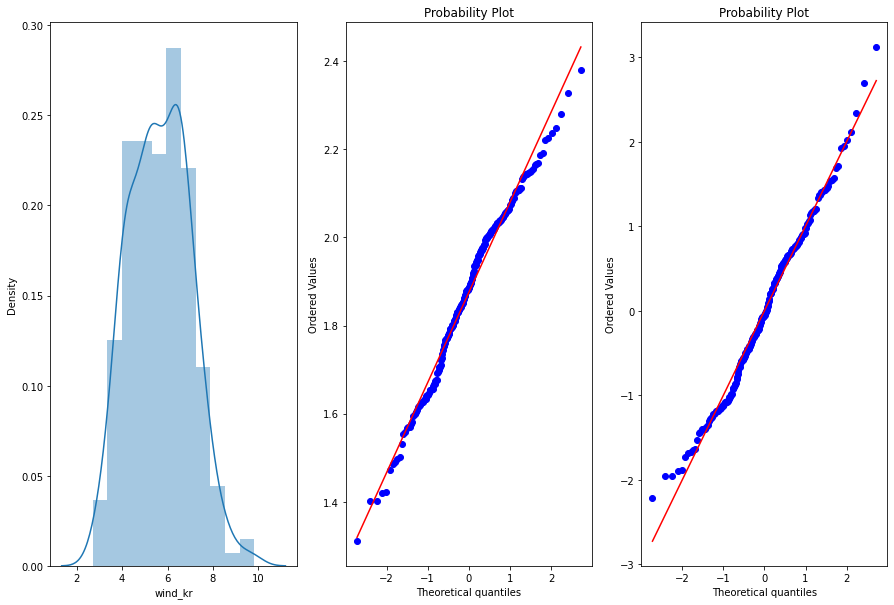

In [725]:
from scipy import stats 

fig = plt.figure(figsize = (15,10))

for i in columns:

  if i == 'wind_kr':
    fig.add_subplot(131)
    sns.distplot(df_whiteleg_shrimp_add[i]) 
        
    df_copy = df_whiteleg_shrimp_add.copy()
    df_copy[i] = np.log1p(df_copy[i])
    fig.add_subplot(132) 
    stats.probplot(df_copy[i], dist=stats.norm, plot=plt)
    
    df_copy1 = df_whiteleg_shrimp_add.copy()
    df_copy1[i] = (df_copy1[i] - df_copy1[i].mean()) / df_copy1[i].std()
    fig.add_subplot(133) 
    stats.probplot(df_copy1[i], dist=stats.norm, plot=plt)

데이터 표준화 실시

Model Training Complete!


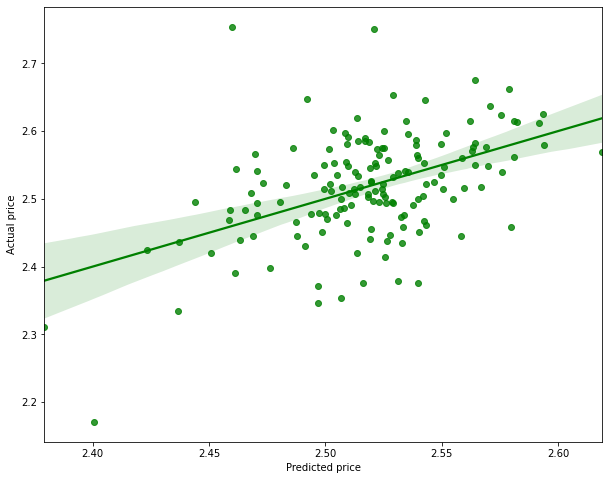

>> RMSE train = 0.06891741236668635
>> RMSE validation = 0.06725441679477732
>> MAE train = 0.05072919383154886
>> MAE validation = 0.04904737402231691
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [657]:
x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

x_features = np.log1p(x_features)
y_target = np.log1p(y_target)

train_model(x_features,y_target)

## Feature Selection

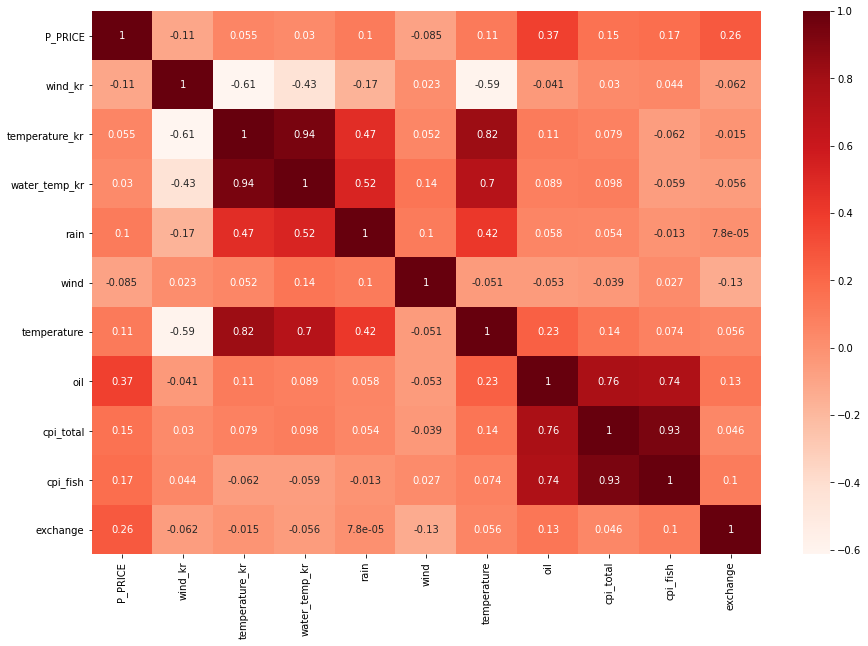

In [658]:
plt.figure(figsize=(15,10))

sns.heatmap(df_whiteleg_shrimp_add.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [659]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_whiteleg_shrimp_add.values, i) for i in range(df_whiteleg_shrimp_add.shape[1])]
vif['features'] = df_whiteleg_shrimp_add.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,6.772488,rain
1,16.805678,exchange
2,19.099199,wind
3,44.624224,wind_kr
4,82.545639,oil
5,112.412564,temperature_kr
6,154.113752,water_temp_kr
7,185.765671,P_PRICE
8,516.142142,temperature
9,3135.062117,cpi_fish


In [660]:
import statsmodels.api as sm

X = df_whiteleg_shrimp_add.drop('P_PRICE',axis=1)
y = df_whiteleg_shrimp_add['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     6.228
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           2.85e-08
Time:                        08:03:14   Log-Likelihood:                -257.59
No. Observations:                 210   AIC:                             537.2
Df Residuals:                     199   BIC:                             574.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.8248      9.295      2.

#### ADD Derived Variable

In [661]:
df_whiteleg_shrimp_add1 = df_whiteleg_shrimp_add.copy()

df_whiteleg_shrimp_add1['cpi'] = df_whiteleg_shrimp_add1['cpi_fish'] / df_whiteleg_shrimp_add1['cpi_total']
df_whiteleg_shrimp_add1['weather_kr'] = (df_whiteleg_shrimp_add1['water_temp_kr'] + df_whiteleg_shrimp_add1['temperature_kr']+df_whiteleg_shrimp_add1['wind_kr']) / 3
df_whiteleg_shrimp_add1['weather'] = (df_whiteleg_shrimp_add1['rain'] + df_whiteleg_shrimp_add1['temperature']+df_whiteleg_shrimp_add1['wind']) / 3
df_whiteleg_shrimp_add1['oil/exchange'] = df_whiteleg_shrimp_add1['oil'] / df_whiteleg_shrimp_add1['exchange']

df_whiteleg_shrimp_add1.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

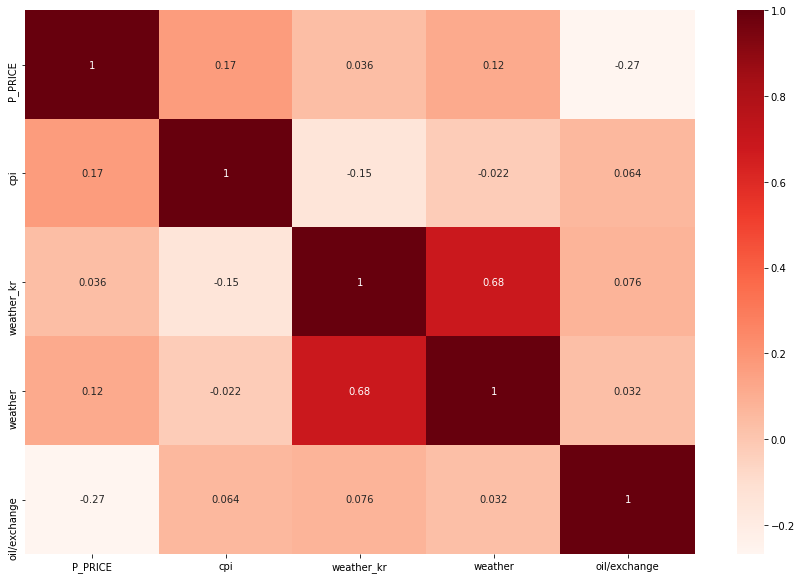

In [662]:
plt.figure(figsize=(15,10))

sns.heatmap(df_whiteleg_shrimp_add1.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [663]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(df_whiteleg_shrimp_add1.values, i) for i in range(df_whiteleg_shrimp_add1.shape[1])]
vif['features'] = df_whiteleg_shrimp_add1.columns

vif = vif.sort_values('VIF').reset_index(drop=True)

vif

,VIF,features
0,1.120155,oil/exchange
1,21.205313,weather_kr
2,75.776371,weather
3,165.903673,P_PRICE
4,182.747709,cpi


In [664]:
import statsmodels.api as sm

X = df_whiteleg_shrimp_add1.drop('P_PRICE',axis=1)
y = df_whiteleg_shrimp_add1['P_PRICE']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                P_PRICE   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     7.293
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           1.64e-05
Time:                        08:03:14   Log-Likelihood:                -272.21
No. Observations:                 210   AIC:                             554.4
Df Residuals:                     205   BIC:                             571.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.7863      2.416      1.567   

Model Training Complete!


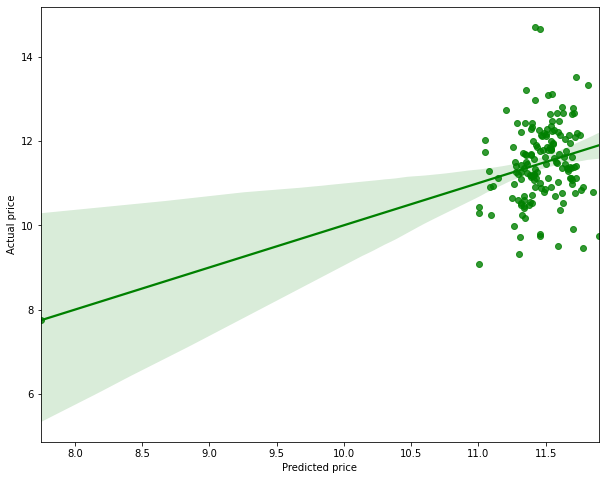

>> RMSE train = 0.8969966623429467
>> RMSE validation = 0.8578650811297541
>> MAE train = 0.6858709337821527
>> MAE validation = 0.7127159037790723
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [665]:
x_features = df_whiteleg_shrimp_add1.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add1['P_PRICE']

train_model(x_features,y_target)

기존의 변수들을 재조합하여 파생변수들을 생성하였지만 여전히 다중공선성 존재하고 p-value 값이 높은 변수가 존재한다는 한계 존재

### PCA

In [666]:
from sklearn.decomposition import PCA

pca = PCA()

x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

pca.fit(x_features)
score = pca.transform(x_features)


In [667]:
ratio = pca.explained_variance_ratio_ # 설명력 비율

ratio

array([4.83912340e-01, 3.90944495e-01, 6.68917263e-02, 3.43093771e-02,
       1.48366131e-02, 4.47327234e-03, 2.80735598e-03, 1.17732791e-03,
       6.47447789e-04, 4.47050231e-08])

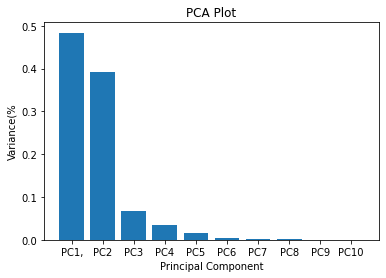

In [668]:
ax = plt.bar(x = range(len(ratio)),height = ratio, tick_label = ['PC1,','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.ylabel('Variance(%')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

Model Training Complete!


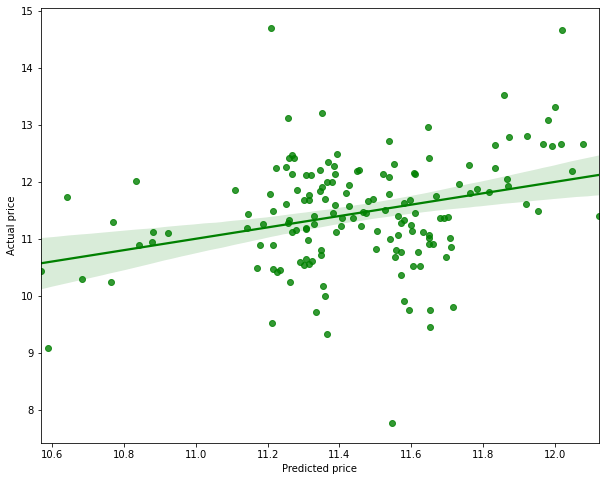

>> RMSE train = 0.915370980637474
>> RMSE validation = 0.7938812330386636
>> MAE train = 0.6830656611595519
>> MAE validation = 0.6624665752125743
-------------------------------------------------


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [669]:
# 주성분 2개로 분석
x_features = df_whiteleg_shrimp_add.drop('P_PRICE', axis=1)
y_target = df_whiteleg_shrimp_add['P_PRICE']

pca = PCA(n_components=2)
pc = pca.fit_transform(x_features)

x_features = pc
y_target = df_whiteleg_shrimp_add['P_PRICE']

train_model(x_features,y_target)

파생변수 추가 및 pca 진행하였음에도 모델 개선이 되지 않았지만

다중공선성을 피하기 위해선 불가피하다.

최종 모델 : df_whiteleg_shrimp_add1

## Final Model

Model Training Complete!


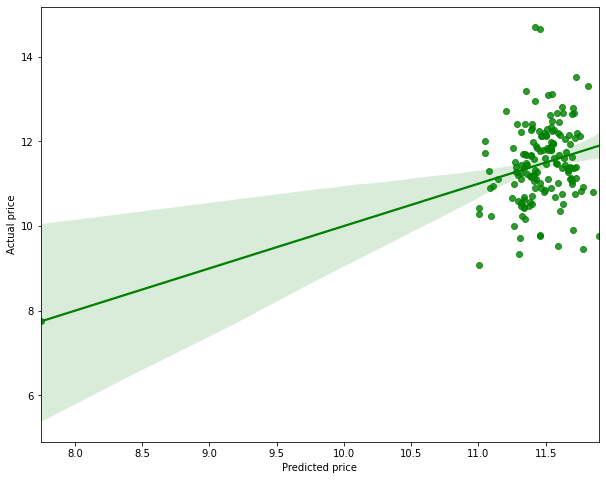

>> RMSE train = 0.8969966623429467
>> RMSE validation = 0.8578650811297541
>> MAE train = 0.6858709337821527
>> MAE validation = 0.7127159037790723
-------------------------------------------------


In [670]:
final_whiteleg_shrimp = df_whiteleg_shrimp_add1

x_features = final_whiteleg_shrimp.drop('P_PRICE', axis=1)
y_target = final_whiteleg_shrimp['P_PRICE']


final_model_shrimp = train_model(x_features,y_target)

# Save

In [671]:
final_squid.to_csv(os.path.join(root, "final_squid.csv"), encoding='utf-8', index=False)
final_salmon.to_csv(os.path.join(root, "final_salmon.csv"), encoding='utf-8', index=False)
final_whiteleg_shrimp.to_csv(os.path.join(root, "final_whiteleg_shrimp.csv"), encoding='utf-8', index=False)

# Best Model Selection

In [672]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [673]:
def model_scaler(data, col, scaler = None):
  
  '''
  정규화 함수
  data : dataframe
  column : P_PRICE
  scaler : standard, robust, minmax, log

  '''
 
  features = data.drop(col, axis=1)
  target = data[col]

  if scaler == 'standard':
    scaler = StandardScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'robust':
    scaler = RobustScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'minmax':
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)

    return features, target

  elif scaler == 'log':
    features = np.log1p(features)

    return features, target

  elif scaler == 'None':

    return features, target


################################################################################################################################################

def model_train(data, col, scaler, model = None):

  '''
  
  data : dataframe
  column : P_PRICE
  scaler : standard, robust, minmax, log
  model_name : linear, ridge, lasso, elastic, decisiontree,
               randomforest, ada, gradient, xgb, lgbm

  '''

  features, target = model_scaler(data, col, scaler)
  x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
  
  if model == 'linear': 
    
    model = LinearRegression()
    neg_mse_scores = cross_val_score(model, features, target, scoring = 'neg_mean_squared_error', cv = 10)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)


    print('RMSE : {:.4f}'.format(avg_rmse))

  elif model == 'ridge':
    
    params = {
              'alpha': (0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1, 1, 10, 100, 200, 50, 30, 20, 29, 58),            
              'fit_intercept':(True, False),
              'normalize':(True, False),

              }

    ridge = Ridge(random_state=0)
    final = RandomizedSearchCV(ridge, param_distributions = params, cv = 5, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(x_train, y_train)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
    
  elif model == 'lasso':

    params = {
              'alpha': (0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1, 1, 10, 100, 200, 50, 30, 20, 29, 58),            
              'fit_intercept':(True, False),
              'normalize':(True, False),

              }

    lasso = Lasso(random_state=0)
    final = RandomizedSearchCV(lasso, param_distributions = params, cv = 5, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  
  elif model == 'elastic':
    

    params = {
       'alpha': (0.1, 0.01, 0.5, 1, 3, 5, 10),
       'l1_ratio':(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.1, 0.1)
    }

    elastic = ElasticNet()
    final = RandomizedSearchCV(elastic, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  elif model == 'decisiontree':
    
    params = {
              'max_depth': [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],            
               #'min_child_samples': randint(5, 50),
              'min_samples_split':[1,3,5,7,10,20,30,50,70,100],
              'min_samples_leaf': [1,3,5,7,10,20,30,50,70,100],
              
    }

    dt = DecisionTreeRegressor(random_state=0)
    final = RandomizedSearchCV(dt, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 1000, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))
  elif model == 'randomforest':
    
    params = {
              'max_depth':  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],           
              'n_estimators':[1,5,10,30,50,70,100,200,500,1000],
               #'min_child_samples': randint(5, 50),
              'min_samples_leaf':[1,3,5,7,10,20,30,50,70,100],
              'min_samples_split': [1,3,5,7,10,20,30,50,70,100],
              'max_leaf_nodes': [1,3,5,7,10,20,30,50,70,100,200,500,700,1000],

              }

    rf = RandomForestRegressor(random_state=0)
    final = RandomizedSearchCV(rf, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))


  elif model == 'gradinet':

    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'subsample' : (0.01, 0.1, 0.5, 0.08, 0.35, 0.3, 0.001, 0.03, 0.006, 0.153, 0.193, 0.0012, 0.0083 ,1),
              'min_samples_split' : [1,3,5,7,10,20,30,50,70,100],
              'max_depth' : [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              }   

    grad = GradientBoostingRegressor()
    final = RandomizedSearchCV(grad, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)
    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

  elif model == 'xgb':
    
    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }   

    xgb = XGBRegressor()
    final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)

    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

  elif model == 'lgbm':
    params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' : [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' : [1,3,5,7,9,15,25,50,100,200,300,500,700],
              'num_leaves': [1,3,5,7,9,15,25,50,100,200,300,500,700],
              'min_child_samples':[1,3,5,7,9,15,25,50,100,200,300,500,700],  
              }   

    lgbm = LGBMRegressor()
    final = RandomizedSearchCV(lgbm, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
    final.fit(features, target)

    pred = final.predict(x_test)

    print('Best Params:', final.best_params_)
    print('Best Score:', np.sqrt(-1 *final.best_score_))
    print('Predict RMSE:',(np.sqrt(mean_squared_error(y_test, pred))))

## Squid

In [674]:
model_train(final_squid,'P_PRICE','None','linear')

RMSE : 0.6196


In [675]:
model_train(final_squid,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.351}
Best Score: 0.6346740326104738
Predict RMSE: 0.6442508706793826


In [676]:
model_train(final_squid,'P_PRICE','None','lasso')

Best Params: {'normalize': True, 'fit_intercept': False, 'alpha': 0.5}
Best Score: 0.6619163854543256
Predict RMSE: 0.6770156472032623


In [677]:
model_train(final_squid,'P_PRICE','None','elastic')

Best Params: {'l1_ratio': 0.0001, 'alpha': 0.01}
Best Score: 0.6695917270044189
Predict RMSE: 0.6591480222607556


In [678]:
model_train(final_squid,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_leaf_nodes': 50, 'max_depth': 100}
Best Score: 0.6800541169708584
Predict RMSE: 0.5048613653482176


In [679]:
model_train(final_squid,'P_PRICE','None','gradinet')

Best Params: {'subsample': 0.08, 'n_estimators': 30, 'min_samples_split': 5, 'max_depth': 700, 'learning_rate': 0.1}
Best Score: 0.68328303518415
Predict RMSE: 0.5437185413396795


In [680]:
model_train(final_squid,'P_PRICE','None','xgb')

[08:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 5, 'min_child_weight': 7, 'max_depth': 500, 'learning_rate': 0.5}
Best Score: 0.7021406944140588
Predict RMSE: 0.42948068201624273


In [681]:
model_train(final_squid,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 25, 'n_estimators': 1000, 'min_child_weight': 5, 'min_child_samples': 15, 'max_depth': 700, 'learning_rate': 0.003}
Best Score: 0.6902803554089293
Predict RMSE: 0.44675786495167635


Score와 RMSE가 모두 좋은 xgb 모델을 최종 모델로 선택

## Salmon

In [682]:
model_train(final_salmon,'P_PRICE','None','linear')

RMSE : 1.7952


In [683]:
model_train(final_salmon,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.1}
Best Score: 1.6173831298518644
Predict RMSE: 1.9158135079196084


In [684]:
model_train(final_salmon,'P_PRICE','None','lasso')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 0.5}
Best Score: 1.9270162254385144
Predict RMSE: 2.0363288354963145


In [685]:
model_train(final_salmon,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 70, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 7, 'max_depth': 15}
Best Score: 1.8589663760060453
Predict RMSE: 1.1143482917411576


In [686]:
model_train(final_salmon,'P_PRICE','None','gradinet')

Best Params: {'subsample': 0.1, 'n_estimators': 30, 'min_samples_split': 30, 'max_depth': 9, 'learning_rate': 0.853}
Best Score: 1.7946386965261578
Predict RMSE: 2.036422445212848


In [687]:
model_train(final_salmon,'P_PRICE','None','xgb')

[08:07:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 70, 'min_child_weight': 500, 'max_depth': 5, 'learning_rate': 0.096}
Best Score: 1.877542808470623
Predict RMSE: 2.0360768300701375


In [688]:
model_train(final_salmon,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 5, 'n_estimators': 100, 'min_child_weight': 1, 'min_child_samples': 3, 'max_depth': 25, 'learning_rate': 0.0001}
Best Score: 1.8762017731287282
Predict RMSE: 2.0267627373257193


Score와 RMSE가 모두 좋은 randomforest 모델을 최종 모델로 선택

## Whiteleg_shrimp

In [689]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','linear')

RMSE : 0.9625


In [690]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','ridge')

Best Params: {'normalize': True, 'fit_intercept': True, 'alpha': 20}
Best Score: 0.9176240524755749
Predict RMSE: 0.8829436493697213


In [691]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','lasso')

Best Params: {'normalize': False, 'fit_intercept': True, 'alpha': 200}
Best Score: 0.9946361581349684
Predict RMSE: 0.8825629180954592


In [692]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','randomforest')

Best Params: {'n_estimators': 10, 'min_samples_split': 20, 'min_samples_leaf': 100, 'max_leaf_nodes': 20, 'max_depth': 100}
Best Score: 0.9776153500138193
Predict RMSE: 0.883233190658569


In [693]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','gradinet')

Best Params: {'subsample': 0.1, 'n_estimators': 30, 'min_samples_split': 30, 'max_depth': 9, 'learning_rate': 0.853}
Best Score: 0.9680504022694745
Predict RMSE: 0.8702960782452538


In [694]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','xgb')

[08:10:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params: {'n_estimators': 100, 'min_child_weight': 300, 'max_depth': 9, 'learning_rate': 0.096}
Best Score: 0.9802666733036903
Predict RMSE: 0.8798169022356569


In [695]:
model_train(final_whiteleg_shrimp,'P_PRICE','None','lgbm')

Best Params: {'num_leaves': 500, 'n_estimators': 30, 'min_child_weight': 3, 'min_child_samples': 25, 'max_depth': 9, 'learning_rate': 0.001}
Best Score: 0.978797570264702
Predict RMSE: 0.8728594789679737


Score와 RMSE가 모두 좋은 gradinet 모델을 최종 모델로 선택

## Best Model

### Squid

In [696]:
 params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'max_depth' :  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              'min_child_weight' :[1,3,5,7,9,15,25,50,100,200,300,500,700],
              }
xgb = XGBRegressor()
squid_final = RandomizedSearchCV(xgb, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)

features = final_squid.drop('P_PRICE',axis=1)
target = final_squid['P_PRICE']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

squid_final.fit(features, target)

[08:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                                                          0.5, 0.04, 0.008,
                                                          0.001, 0.351, 0.096,
                                 

### Salmon

In [697]:
 params = {
              'max_depth':  [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],           
              'n_estimators':[1,5,10,30,50,70,100,200,500,1000],
               #'min_child_samples': randint(5, 50),
              'min_samples_leaf':[1,3,5,7,10,20,30,50,70,100],
              'min_samples_split': [1,3,5,7,10,20,30,50,70,100],
              'max_leaf_nodes': [1,3,5,7,10,20,30,50,70,100,200,500,700,1000],

              }

rf = RandomForestRegressor(random_state=0)
salmon_final = RandomizedSearchCV(rf, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
features = final_salmon.drop('P_PRICE',axis=1)
target = final_salmon['P_PRICE']
salmon_final.fit(features, target)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

### Whiteleg Shrimp

In [726]:
 params = {'n_estimators' : [1,5,10,30,50,70,100,200,500,1000],
              'learning_rate' :(0.01, 0.0001, 0.003, 0.5, 0.04, 0.008, 0.001, 0.351, 0.096, 0.853, 0.185, 0.01825, 0.012385, 0.1),
              'subsample' : (0.01, 0.1, 0.5, 0.08, 0.35, 0.3, 0.001, 0.03, 0.006, 0.153, 0.193, 0.0012, 0.0083 ,1),
              'min_samples_split' : [1,3,5,7,10,20,30,50,70,100],
              'max_depth' : [1,3,5,7,9,15,25,50,100,200,300,500,700,1000],  
              }    

grad = GradientBoostingRegressor()
whiteleg_shrimp_final = RandomizedSearchCV(grad, param_distributions = params, cv = 10, scoring = 'neg_mean_squared_error', n_iter = 50, n_jobs = -1 ,random_state=0)
features = final_whiteleg_shrimp.drop('P_PRICE',axis=1)
target = final_whiteleg_shrimp['P_PRICE']
whiteleg_shrimp_final.fit(features, target)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

# Test

## Test Data

### Import Data

In [699]:
df_test = pd.read_excel(os.path.join(root, 'test.xlsx'))

### Preprocessing

In [700]:
set_week(df_test, 'REG_DATE')

In [701]:
check_week(df_test)

(2015, 53)(2016, 1)(2016, 2)(2016, 3)(2016, 4)(2016, 5)(2016, 6)(2016, 7)(2016, 8)(2016, 9)(2016, 10)(2016, 11)(2016, 12)(2016, 13)(2016, 14)(2016, 15)(2016, 16)(2016, 17)(2016, 18)(2016, 19)(2016, 20)(2016, 21)(2016, 22)(2016, 23)(2016, 24)(2016, 25)(2016, 26)(2016, 27)(2016, 28)(2016, 29)(2016, 30)(2016, 31)(2016, 32)(2016, 33)(2016, 34)(2016, 35)(2016, 36)(2016, 37)(2016, 38)(2016, 39)(2016, 40)(2016, 41)(2016, 42)(2016, 43)(2016, 44)(2016, 45)(2016, 46)(2016, 47)(2016, 48)(2016, 49)(2016, 50)(2016, 51)(2016, 52)(2017, 1)(2017, 2)(2017, 3)(2017, 4)(2017, 5)(2017, 6)(2017, 7)(2017, 8)(2017, 9)(2017, 10)(2017, 11)(2017, 12)(2017, 13)(2017, 14)(2017, 15)(2017, 16)(2017, 17)(2017, 18)(2017, 19)(2017, 20)(2017, 21)(2017, 22)(2017, 23)(2017, 24)(2017, 25)(2017, 26)(2017, 27)(2017, 28)(2017, 29)(2017, 30)(2017, 31)(2017, 32)(2017, 33)(2017, 34)(2017, 35)(2017, 36)(2017, 37)(2017, 38)(2017, 39)(2017, 40)(2017, 41)(2017, 42)(2017, 43)(2017, 44)(2017, 45)(2017, 46)(2017, 47)(2017, 48)(2017, 4

#### Squid

In [702]:
df_test_squid = df_test[(df_test['P_NAME']=='오징어') & ((df_test['CTRY_2']=='페루') | (df_test['CTRY_2']=='중국') | (df_test['CTRY_2']=='칠레'))]

df_test_squid = df_test_squid[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_squid

,CTRY_1,CTRY_2,P_PRICE,year,week
15,중국,중국,2.706303,2020,2
16,중국,중국,1.940000,2020,2
39,페루,칠레,2.195883,2020,2
40,페루,칠레,1.922647,2020,2
41,페루,페루,2.855495,2020,2
...,...,...,...,...,...
9421,페루,페루,2.160000,2020,53
9422,페루,페루,2.910000,2020,53
9428,페루,페루,1.330000,2020,53
9433,중국,중국,2.090000,2020,53


##### Merge Features

In [703]:
df_test_squid_add = pd.merge(df_test_squid, df_weather_kr, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_squid_add = pd.merge(df_test_squid_add, df_oil, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_cpi, how='left', on=['year', 'week'])
df_test_squid_add = pd.merge(df_test_squid_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_squid_add = df_test_squid_add.sort_values('CTRY_2')

df_test_squid_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,중국,중국,2.706303,2020,2,7.867857,8.473571,12.859854,2.332272,2.422505,-0.42017,60.836,105.79,118.44,0.1433
291,중국,중국,4.066718,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
290,중국,중국,3.852694,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
289,중국,중국,1.933681,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
286,중국,중국,1.455000,2020,28,4.008759,21.481955,20.884173,8.223988,2.236920,20.27157,40.464,104.86,119.22,0.1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,페루,페루,2.115951,2020,5,7.460000,7.672143,11.654676,NaN,NaN,NaN,52.730,105.80,119.49,0.2999
464,페루,페루,2.489640,2020,40,4.302041,21.297279,22.272109,NaN,NaN,NaN,39.176,106.20,119.06,0.2785
465,페루,페루,2.489640,2020,40,4.302041,21.297279,22.272109,NaN,NaN,NaN,39.176,105.61,120.00,0.2785
60,페루,페루,2.130480,2020,6,7.084828,4.409091,11.387413,NaN,NaN,NaN,50.348,105.80,119.49,0.2963


##### Filling Missing Values

In [704]:
df_test_squid_add.isna().sum() # 페루 날씨 데이터 결측값 존재

CTRY_1              0
CTRY_2              0
P_PRICE             0
year                0
week                0
wind_kr             0
temperature_kr      0
water_temp_kr       0
rain              290
wind              290
temperature       290
oil                 0
cpi_total           0
cpi_fish            0
exchange            0
dtype: int64

In [705]:
df_test_squid_add.fillna(method='ffill',inplace=True)  # 가까운 나라인 칠레 데이터로 대체

In [706]:
df_test_squid_add.isna().sum() # 결측값 처리 완료

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [707]:
df_test_squid_add = df_test_squid_add.groupby(['year','week']).mean()

df_test_squid_add['cpi'] = df_test_squid_add['cpi_fish'] / df_test_squid_add['cpi_total']
df_test_squid_add['weather_kr'] = (df_test_squid_add['water_temp_kr'] + df_test_squid_add['temperature_kr']+df_test_squid_add['wind_kr']) / 3
df_test_squid_add['weather'] = (df_test_squid_add['rain'] + df_test_squid_add['temperature']+df_test_squid_add['wind']) / 3
df_test_squid_add['oil/exchange'] = df_test_squid_add['oil'] / df_test_squid_add['exchange']

df_test_squid_add.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)
df_test_squid_add

P_PRICE       cpi  weather_kr   weather  oil/exchange
year week                                                        
2020 2     2.694026  1.119577    9.733761  4.759077    441.127206
     3     2.799003  1.119577    8.204895  5.118720    336.426079
     4     2.820781  1.119577    9.030952  5.824548    380.533853
     5     2.573288  1.124486    8.928940  5.898016    294.300844
     6     2.749292  1.129395    7.627110  5.363160    195.279744
     7     3.181970  1.129395    8.938265  6.019308    173.404616
     8     2.915586  1.129395    8.196600  5.117995    199.562726
     9     2.421211  1.129412    8.902038  6.268914    297.815209
     10    3.069136  1.129430    8.290734  5.431189    224.563098
     11    2.733139  1.129430    8.965945  6.218056    177.907983
     12    2.741034  1.129430    9.239646  6.510469    174.482094
     13    2.356233  1.129430    9.360317  6.926688    190.765681
     14    1.916776  1.138581    9.556794  6.734281    211.559685
     15    2.827398  1.147785    9.424179  5.424902    226.404060
     16    2.478963  1.147785   10.170549  6.534766    157.906982
     17    2.360139  1.147785   10.584807  6.261396     27.038305
     18    2.324205  1.150816   10.952844  6.546928    153.073826
     19    2.914349  1.153854   11.563492  7.167204    177.467049
     20    2.769251  1.153854   11.587982  6.690258    167.569408
     21    2.554303  1.153854   12.010270  7.106781    229.439146
     22    2.896299  1.153854   12.256367  8.048197    217.024711
     23    2.349213  1.148088   13.341435  7.403742    292.172188
     24    2.593165  1.148088   14.704286  7.901198    244.235443
     25    2.325860  1.148088   14.968810  8.148838    296.575667
     26    2.684748  1.148088   15.464084  8.614657    394.404506
     27    2.451304  1.142517   15.162109  8.225091    313.029713
     28    2.660586  1.136944   15.458296  8.021080    264.850087
     29    3.086476  1.136944   16.073634  7.280066    283.245292
     30    2.492329  1.136944   16.325551  7.416444    324.890825
     31    2.644042  1.129112   16.661631  7.061681    245.287563
     32    3.090630  1.121327   17.963647  7.444434    253.808902
     33    2.678793  1.121327   18.260336  6.658018    228.064282
     34    2.635599  1.121327   18.475012  6.655094    256.429059
     35    2.327621  1.121327   19.272713  7.032399    277.446416
     36    2.408983  1.121209   18.741802  6.490081    234.455941
     37    2.575534  1.121092   17.492080  6.448708    220.674552
     38    2.559725  1.121092   16.541026  6.908889    235.539306
     39    2.543923  1.121092   16.975799  6.600938    210.376536
     40    2.177672  1.128653   15.957143  6.285739    251.414753
     41    2.556555  1.136256   16.021542  6.133756    214.804179
     42    2.289809  1.136256   14.912612  6.845922    214.966446
     43    4.139414  1.136256   14.434049  6.270674    198.178244
     44    2.780823  1.142106   13.752653  6.301738    150.714126
     45    2.626703  1.147962   13.028963  5.807151    209.199348
     46    2.673890  1.147962   12.341885  7.774205    201.933612
     47    2.441362  1.147962   13.339376  5.537443    218.646435
     48    2.663866  1.147962   11.153132  5.170257    190.475786
     49    2.382441  1.150305   10.161099  4.624277    197.323485
     50    2.823628  1.152645    9.988194  4.942098    199.516872
     51    2.047650  1.152645    8.564529  5.394173    219.698136
     52    2.450699  1.152645    9.277786  4.225514    222.324337
     53    2.277500  1.148864    8.407878  4.187758    224.301025

##### Final Test DF

In [708]:
final_test_squid = df_test_squid_add

#### Salmon

In [709]:
df_test_salmon = df_test[(df_test['P_NAME']=='연어') & (df_test['CTRY_2']=='노르웨이')]

df_test_salmon = df_test_salmon[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_salmon

,CTRY_1,CTRY_2,P_PRICE,year,week
37,노르웨이,노르웨이,28.500000,2020,2
94,노르웨이,노르웨이,12.199457,2020,2
195,노르웨이,노르웨이,16.335035,2020,2
196,노르웨이,노르웨이,14.756580,2020,2
215,노르웨이,노르웨이,13.170679,2020,2
...,...,...,...,...,...
9435,노르웨이,노르웨이,8.750000,2020,53
9448,노르웨이,노르웨이,29.740000,2020,53
9459,노르웨이,노르웨이,15.290000,2020,53
9471,노르웨이,노르웨이,14.260000,2020,53


##### Merge Features

In [710]:
df_test_salmon_add = pd.merge(df_test_salmon, df_weather_kr, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_oil, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_cpi, how='left', on=['year', 'week'])
df_test_salmon_add = pd.merge(df_test_salmon_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_salmon_add = df_test_salmon_add.sort_values(['year','week'])

df_test_salmon_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,노르웨이,노르웨이,28.500000,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
1,노르웨이,노르웨이,12.199457,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
2,노르웨이,노르웨이,16.335035,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
3,노르웨이,노르웨이,14.756580,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
4,노르웨이,노르웨이,13.170679,2020,2,7.867857,8.473571,12.859854,2.692562,7.07438,1.905372,60.836,105.79,118.44,0.1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,노르웨이,노르웨이,15.290000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,106.47,121.92,0.1158
382,노르웨이,노르웨이,14.260000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,105.67,121.80,0.1158
383,노르웨이,노르웨이,14.260000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,106.47,121.92,0.1158
384,노르웨이,노르웨이,8.590000,2020,53,8.074658,4.307194,12.841781,NaN,NaN,NaN,48.135,105.67,121.80,0.1158


##### Filling Missing Values

In [711]:
df_test_salmon_add.isna().sum() # 결측값 존재

CTRY_1              0
CTRY_2              0
P_PRICE             0
year                0
week                0
wind_kr             0
temperature_kr      0
water_temp_kr       0
rain              232
wind              232
temperature       232
oil                 0
cpi_total           0
cpi_fish            0
exchange            0
dtype: int64

In [712]:
df_test_salmon_add.fillna(method='ffill',inplace=True) # 전주 값으로 대체

In [713]:
df_test_salmon_add.isna().sum() # 결측값 처리 완료

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [714]:
df_test_salmon_add = df_test_salmon_add.groupby(['year','week']).mean()

df_test_salmon_add['cpi'] = df_test_salmon_add['cpi_fish'] / df_test_salmon_add['cpi_total']
df_test_salmon_add['weather_kr'] = (df_test_salmon_add['water_temp_kr'] + df_test_salmon_add['temperature_kr']+df_test_salmon_add['wind_kr']) / 3
df_test_salmon_add['weather'] = (df_test_salmon_add['rain'] + df_test_salmon_add['temperature']+df_test_salmon_add['wind']) / 3
df_test_salmon_add['oil/exchange'] = df_test_salmon_add['oil'] / df_test_salmon_add['exchange']

df_test_salmon_add.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

df_test_salmon_add

P_PRICE       cpi  weather_kr   weather  oil/exchange
year week                                                         
2020 2     16.992350  1.119577    9.733761  3.890771    535.057168
     3     17.340328  1.119577    8.204895  2.688075    519.647094
     4     15.587532  1.119577    9.030952  2.938433    506.410714
     5     16.892669  1.124486    8.928940  1.822629    481.992687
     6     15.975454  1.129395    7.627110  2.236501    467.483751
     7     15.170032  1.129395    8.938265  2.809392    474.767658
     8     15.080865  1.129395    8.196600  2.951629    490.185185
     9     15.723319  1.129412    8.902038  0.888519    453.014981
     10    15.735015  1.129430    8.290734  2.211111    423.587361
     11    15.187748  1.129430    8.965945  1.717353    309.770115
     12    15.017789  1.129430    9.239646  2.018229    254.203494
     13    14.675168  1.129430    9.360317  3.061187    269.071926
     14    14.396876  1.138581    9.556794  2.337354    241.645570
     15    15.218819  1.147785    9.424179  3.086441    254.592902
     16    12.040515  1.147785   10.170549  3.413866    208.136646
     17    14.279194  1.147785   10.584807  3.416444     41.047120
     18    13.881676  1.150816   10.952844  2.557172    165.720294
     19    13.452220  1.153854   11.563492  3.138768    242.461220
     20    13.567672  1.153854   11.587982  3.530208    273.140496
     21    14.117930  1.153854   12.010270  4.313960    330.792377
     22    14.430410  1.153854   12.256367  3.888889    342.615694
     23    15.218256  1.148088   13.341435  3.995238    358.999038
     24    15.704652  1.148088   14.704286  3.995238    350.611111
     25    15.732229  1.148088   14.968810  3.995238    366.507634
     26    14.820120  1.148088   15.464084  3.995238    376.657061
     27    14.637310  1.142517   15.162109  3.995238    386.679574
     28    14.746793  1.136944   15.458296  3.995238    380.300752
     29    14.494195  1.136944   16.073634  3.995238    383.248347
     30    14.202351  1.136944   16.325551  3.995238    381.974170
     31    15.263169  1.129112   16.661631  3.995238    371.428571
     32    14.266385  1.121327   17.963647  3.995238    380.036530
     33    14.027953  1.121327   18.260336  3.995238    380.596745
     34    14.434727  1.121327   18.475012  3.995238    378.441098
     35    14.297317  1.121327   19.272713  3.995238    387.704770
     36    14.017716  1.121209   18.741802  3.995238    358.885980
     37    14.295397  1.121092   17.492080  3.995238    337.158177
     38    14.276205  1.121092   16.541026  3.995238    357.326107
     39    14.575858  1.121092   16.975799  3.995238    370.287837
     40    15.085690  1.128653   15.957143  3.995238    371.688805
     41    14.927119  1.136256   16.021542  3.995238    371.668203
     42    14.598102  1.136256   14.912612  3.995238    370.219378
     43    14.698816  1.136256   14.434049  3.995238    378.376866
     44    19.295902  1.142106   13.752653  3.995238    346.543438
     45    14.480638  1.147962   13.028963  3.995238    362.428298
     46    14.481199  1.147962   12.341885  3.995238    369.864253
     47    14.269818  1.147962   13.339376  3.995238    377.681159
     48    14.583272  1.147962   11.153132  3.995238    405.406872
     49    14.545394  1.150305   10.161099  3.995238    404.039146
     50    14.501844  1.152645    9.988194  3.995238    402.852143
     51    14.571845  1.152645    8.564529  3.995238    420.122592
     52    14.864855  1.152645    9.277786  3.995238    413.300173
     53    15.207143  1.148864    8.407878  3.995238    415.673575

##### Final Test DF

In [715]:
final_test_salmon = df_test_salmon_add

#### Whiteleg Shrimp

In [716]:
df_test_whiteleg_shrimp = df_test[(df_test['P_NAME']=='흰다리새우') & ((df_test['CTRY_2']=='베트남') | (df_test['CTRY_2']=='태국'))]

df_test_whiteleg_shrimp = df_test_whiteleg_shrimp[['CTRY_1','CTRY_2','P_PRICE','year','week']]

df_test_whiteleg_shrimp

,CTRY_1,CTRY_2,P_PRICE,year,week
51,태국,태국,11.519824,2020,2
52,태국,태국,8.056061,2020,2
64,베트남,베트남,9.690003,2020,2
65,베트남,베트남,8.013686,2020,2
99,태국,태국,15.130751,2020,2
...,...,...,...,...,...
9397,베트남,베트남,7.830000,2020,53
9398,베트남,베트남,16.770000,2020,53
9415,태국,태국,21.040000,2020,53
9423,태국,태국,9.620000,2020,53


##### Merge Features

In [717]:
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp, df_weather_kr, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_oil, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_cpi, how='left', on=['year', 'week'])
df_test_whiteleg_shrimp_add = pd.merge(df_test_whiteleg_shrimp_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

df_test_whiteleg_shrimp_add = df_test_whiteleg_shrimp_add.sort_values(['year','week'])

df_test_whiteleg_shrimp_add

,CTRY_1,CTRY_2,P_PRICE,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,태국,태국,11.519824,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
1,태국,태국,8.056061,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
2,베트남,베트남,9.690003,2020,2,7.867857,8.473571,12.859854,0.644828,1.931034,22.303448,60.836,105.79,118.44,0.000043
3,베트남,베트남,8.013686,2020,2,7.867857,8.473571,12.859854,0.644828,1.931034,22.303448,60.836,105.79,118.44,0.000043
4,태국,태국,15.130751,2020,2,7.867857,8.473571,12.859854,11.800000,1.000000,27.680000,60.836,105.79,118.44,0.033100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,태국,태국,21.040000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,106.47,121.92,0.033100
409,태국,태국,9.620000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,105.67,121.80,0.033100
410,태국,태국,9.620000,2020,53,8.074658,4.307194,12.841781,2.183333,3.500000,27.466667,48.135,106.47,121.92,0.033100
411,베트남,베트남,7.410000,2020,53,8.074658,4.307194,12.841781,0.566667,3.000000,20.553333,48.135,105.67,121.80,0.000043


##### Filling Missing Values

In [718]:
df_test_whiteleg_shrimp_add.isna().sum()

CTRY_1            0
CTRY_2            0
P_PRICE           0
year              0
week              0
wind_kr           0
temperature_kr    0
water_temp_kr     0
rain              0
wind              0
temperature       0
oil               0
cpi_total         0
cpi_fish          0
exchange          0
dtype: int64

##### Grouping

In [719]:
df_test_whiteleg_shrimp_add = df_test_whiteleg_shrimp_add.groupby(['year','week']).mean()

df_test_whiteleg_shrimp_add['cpi'] = df_test_whiteleg_shrimp_add['cpi_fish'] / df_test_whiteleg_shrimp_add['cpi_total']
df_test_whiteleg_shrimp_add['weather_kr'] = (df_test_whiteleg_shrimp_add['water_temp_kr'] + df_test_whiteleg_shrimp_add['temperature_kr']+df_test_whiteleg_shrimp_add['wind_kr']) / 3
df_test_whiteleg_shrimp_add['weather'] = (df_test_whiteleg_shrimp_add['rain'] + df_test_whiteleg_shrimp_add['temperature']+df_test_whiteleg_shrimp_add['wind']) / 3
df_test_whiteleg_shrimp_add['oil/exchange'] = df_test_whiteleg_shrimp_add['oil'] / df_test_whiteleg_shrimp_add['exchange']

df_test_whiteleg_shrimp_add.drop(['cpi_fish','cpi_total','water_temp_kr','temperature_kr','wind_kr','wind','temperature','rain','oil','exchange'],axis=1,inplace=True)

df_test_whiteleg_shrimp_add

P_PRICE       cpi  weather_kr    weather  oil/exchange
year week                                                          
2020 2      9.902466  1.119577    9.733761  10.243190   4890.563477
     3      9.595764  1.119577    8.204895   7.945411   7030.910689
     4      9.313120  1.119577    9.030952   8.588566  11973.416939
     5     10.731888  1.124486    8.928940   9.566386   4317.009492
     6     11.815052  1.129395    7.627110   8.880391   4678.314824
     7     11.837182  1.129395    8.938265   9.769268   3198.510898
     8      9.060699  1.129395    8.196600  10.646000   8202.107149
     9     10.900109  1.129412    8.902038  11.193889   3057.989402
     10    11.752713  1.129430    8.290734  11.687983   8568.598645
     11    13.278888  1.129430    8.965945  11.061296   3042.685521
     12    12.167508  1.129430    9.239646   9.274599   3168.064152
     13    12.074429  1.129430    9.360317  11.432236   1518.803069
     14    11.699113  1.138581    9.556794  10.281823   1495.188185
     15    12.336940  1.147785    9.424179  11.263947   1862.429670
     16    12.885259  1.147785   10.170549  12.301070   1530.291722
     17    10.531373  1.147785   10.584807  11.923684    254.193528
     18    12.741518  1.150816   10.952844  11.107685   1191.739983
     19    10.975996  1.153854   11.563492  12.986013   1515.448683
     20    12.433387  1.153854   11.587982  13.714696   1986.444491
     21    12.992849  1.153854   12.010270  12.835238   2461.945126
     22    12.863254  1.153854   12.256367  13.532059   2714.547641
     23    12.298451  1.148088   13.341435  13.093115   2357.552698
     24    11.462716  1.148088   14.704286  13.285610   3562.630064
     25    11.543317  1.148088   14.968810  13.652843   2679.449472
     26     9.772050  1.148088   15.464084  12.925529   4234.641690
     27    11.568231  1.142517   15.162109  12.628664   2155.318681
     28    13.310962  1.136944   15.458296  12.156157   3145.067820
     29    11.317738  1.136944   16.073634  11.799389   4451.913648
     30    10.571139  1.136944   16.325551  13.025194   3508.402549
     31    11.521077  1.129112   16.661631  15.028742   3840.523778
     32    10.593069  1.121327   17.963647  13.322613   3028.909035
     33    11.227565  1.121327   18.260336  13.910151   3054.316841
     34    10.196777  1.121327   18.475012  11.459325   3100.175361
     35    11.652322  1.121327   19.272713  12.470648   4739.676723
     36    11.038631  1.121209   18.741802  14.050789   2551.136041
     37    11.637289  1.121092   17.492080  13.672113   1772.844805
     38    10.616361  1.121092   16.541026  16.041627   2785.290551
     39    12.426220  1.121092   16.975799  13.605544   2911.781528
     40    10.879439  1.128653   15.957143  14.260249   2476.114421
     41    11.382807  1.136256   16.021542  13.061696   2524.864693
     42    11.968719  1.136256   14.912612  15.601642   2938.804036
     43    10.888223  1.136256   14.434049  11.463426   2531.711150
     44    11.467702  1.142106   13.752653  14.481514   2632.001144
     45    12.732091  1.147962   13.028963  11.697766   2750.729653
     46     9.438308  1.147962   12.341885  13.055362   3118.443896
     47    11.865793  1.147962   13.339376  13.134815   2516.115702
     48    12.399499  1.147962   11.153132  13.030983   2722.144369
     49    10.708834  1.150305   10.161099  14.848077   5483.185724
     50    10.943944  1.152645    9.988194  12.737321   2432.073377
     51    11.916850  1.152645    8.564529  15.812923   2886.481463
     52    10.994024  1.152645    9.277786  12.448095   2874.417891
     53    13.145714  1.148864    8.407878   9.330000   3387.301997

##### Final Test DF

In [720]:
final_test_whiteleg_shrimp = df_test_whiteleg_shrimp_add

## evaluation

### Squid

In [721]:
squid_test_features = final_test_squid.drop('P_PRICE',axis=1)
squid_test_target = final_test_squid['P_PRICE']

pred = squid_final.predict(squid_test_features)

print('Best Params:', squid_final.best_params_)
print('Best Score:', np.sqrt(-1 *squid_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(squid_test_target, pred))))

Best Params: {'n_estimators': 5, 'min_child_weight': 7, 'max_depth': 500, 'learning_rate': 0.5}
Best Score: 0.7021406944140588
Predict RMSE: 0.6235260950732737


### Salmon

In [722]:
salmon_test_features = final_test_salmon.drop('P_PRICE',axis=1)
salmon_test_target = final_test_salmon['P_PRICE']

pred = squid_final.predict(salmon_test_features)

print('Best Params:', salmon_final.best_params_)
print('Best Score:', np.sqrt(-1 *salmon_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(salmon_test_target, pred))))

Best Params: {'n_estimators': 70, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 7, 'max_depth': 15}
Best Score: 1.8589663760060453
Predict RMSE: 11.885984369007074


### Whiteleg Shrimp

In [727]:
whiteleg_shrimp_test_features = final_test_whiteleg_shrimp.drop('P_PRICE',axis=1)
whiteleg_shrimp_test_target = final_test_whiteleg_shrimp['P_PRICE']

pred = squid_final.predict(whiteleg_shrimp_test_features)

print('Best Params:', whiteleg_shrimp_final.best_params_)
print('Best Score:', np.sqrt(-1 *whiteleg_shrimp_final.best_score_))
print('Predict RMSE:',(np.sqrt(mean_squared_error(whiteleg_shrimp_test_target, pred))))

Best Params: {'subsample': 0.1, 'n_estimators': 30, 'min_samples_split': 30, 'max_depth': 9, 'learning_rate': 0.853}
Best Score: 0.9317864179450749
Predict RMSE: 8.321279904460757
